### Notebook Setup

In [1]:
run ../initialize.ipynb

/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/seaborn-0.8.1-py3.4.egg/seaborn/apionly.py:6: UserWarning: As seaborn no longer sets a default style on import, the seaborn.apionly module is deprecated. It will be removed in a future version.
  warnings.warn(msg, UserWarning)


Lax Version : 1.6.0


In [2]:
plt.style.use('luca')
mpl.font_manager._rebuild()

### Find and Load SR0 Datasets by Source

Split SR0 datasets by calibration source or background data. Finishes by returning dict with pandas dataframe of all data for each subset of data

In [ ]:
datasets = hax.runs.datasets 
datasets = hax.runs.tags_selection(include=['*sciencerun0'],
                                  exclude=['bad','messy', 'test',
                                           'nofield','lowfield',
                                           'commissioning', 'flash',
                                           'pmttrip','trip','_pmttrip',
                                           'source_opening',
                                           ],
                                  )
datasets= hax.cuts.selection(datasets, datasets['location'] != '', 'Processed data available')

#Radon
datasets_rn = hax.cuts.selection(datasets, datasets['source__type']=='Rn220', 'Source in place')
dataset_names_rn = datasets_rn['name']

#Bkg
datasets_bkg = hax.cuts.selection(datasets, datasets['source__type']=='none', 'Source in place')
dataset_names_bkg = datasets_bkg['name']

#Krypton
datasets_kr = hax.cuts.selection(datasets, datasets['source__type']=='Kr83m', 'Source in place')
dataset_names_kr = datasets_kr['name']


In [ ]:
%%time
print('Searching for Processed Pickle Files')
simpath= '/project/lgrandi/jpienaar/cache_files/'

#Find datasets
datasets = get_file_list(simpath, '*Delay.hdf5', ' ')
print('Found %d datasets' % len(datasets))

dfs_rn=[]
dfs_kr=[]
dfs_bkg=[]
for dataset in tqdm(datasets[:]):
    key=dataset[:-7]
    if dataset_names_rn.isin([dataset[:-11]]).any():
        run_df = pd.read_hdf(simpath+dataset)
        dfs_rn.append(run_df)       
              
    elif dataset_names_kr.isin([dataset[:-11]]).any():
        run_df = pd.read_hdf(simpath+dataset)
        dfs_kr.append(run_df)
        
    elif dataset_names_bkg.isin([dataset[:-11]]).any():
        run_df = pd.read_hdf(simpath+dataset)
        dfs_bkg.append(run_df)

    
dfs_rn=pd.concat(dfs_rn)
dfs_kr=pd.concat(dfs_kr)
dfs_bkg=pd.concat(dfs_bkg)

In [ ]:
dict_source_sr0={'Radon' : dfs_rn, 'Background' : dfs_bkg, 'Krypton': dfs_kr}
for source, df in dict_source_sr0.items():
    print(source, len(df))

### Find and Load SR1 Datasets

Split SR1 datasets by calibration source or background data. Finishes by returning dict with pandas dataframe of all data for each subset of data

In [3]:
datasets = hax.runs.datasets 
datasets = hax.runs.tags_selection(include=['*sciencerun1'],
                                  exclude=['bad','messy', 'test',
                                           'nofield','lowfield',
                                           'commissioning', 'flash',
                                           'pmttrip','trip','_pmttrip',
                                           'source_opening',
                                           ],
                                  )
datasets= hax.cuts.selection(datasets, datasets['location'] != '', 'Processed data available')

#Radon
datasets_rn = hax.cuts.selection(datasets, datasets['source__type']=='Rn220', 'Source in place')
dataset_names_rn = datasets_rn['name']

#Bkg
datasets_bkg = hax.cuts.selection(datasets, datasets['source__type']=='none', 'Source in place')
dataset_names_bkg = datasets_bkg['name']

#Krypton
datasets_kr = hax.cuts.selection(datasets, datasets['source__type']=='Kr83m', 'Source in place')
dataset_names_kr = datasets_kr['name']


Processed data available selection: 0 rows removed (100.00% passed)
Source in place selection: 7227 rows removed (4.56% passed)
Source in place selection: 1185 rows removed (84.35% passed)
Source in place selection: 7117 rows removed (6.01% passed)


/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/hax-2.5.0-py3.4.egg/hax/cuts.py:130: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  d.cut_history = prev_cuts + [passthrough_dict]


In [4]:
%%time
print('Searching for Processed Pickle Files')
simpath = '/scratch/midway2/jpienaar/cache_files/'
#simpath= '/project/lgrandi/jpienaar/cache_files/'


#Find datasets
datasets = get_file_list(simpath, '*Delay.hdf5', ' ')
print('Found %d datasets' % len(datasets))

dfs_rn=[]
dfs_kr=[]
dfs_bkg=[]
for dataset in tqdm(datasets[:]):
    key=dataset[:-7]
    if dataset_names_rn.isin([dataset[:-11]]).any():
        if len(dfs_bkg)<200:
            run_df = pd.read_hdf(simpath+dataset)
            dfs_rn.append(run_df)       
              
    elif dataset_names_kr.isin([dataset[:-11]]).any():
        if len(dfs_bkg)<150:
            run_df = pd.read_hdf(simpath+dataset)
            dfs_kr.append(run_df)
        
    elif dataset_names_bkg.isin([dataset[:-11]]).any():
        if len(dfs_bkg)<150:
            run_df = pd.read_hdf(simpath+dataset)
            dfs_bkg.append(run_df)

    
dfs_rn=pd.concat(dfs_rn)
dfs_kr=pd.concat(dfs_kr)
dfs_bkg=pd.concat(dfs_bkg)

  9%|▊         | 104/1190 [00:00<00:01, 1033.35it/s]

Searching for Processed Pickle Files
Found 1190 datasets


100%|██████████| 1190/1190 [02:49<00:00,  7.04it/s] 


CPU times: user 34.5 s, sys: 34.8 s, total: 1min 9s
Wall time: 3min 39s


In [5]:
dict_source_sr1={'Radon' : dfs_rn, 'Background' : dfs_bkg, 'Krypton': dfs_kr}
for source, df in dict_source_sr1.items():
    print(source, len(df))

Background 4438571
Krypton 3594905
Radon 1166733


###  Set Up Binning and Constants

In [30]:
#Binning for delay between SEs and Primary S2s
_tmax=100
_tmin=0
_tbins = 200
_tbin_space = np.linspace(_tmin, _tmax, _tbins+1)

#Binning for delay between SEs and Primary S2s
_tmax_ext=1000
_tmin=0
_tbins = 200
_tbin_ext_space = np.linspace(_tmin, _tmax_ext, _tbins+1)

#Binning for Window in which we recorded data
_wmax = 1500
_wmin = 0
_wbins = 500
_wbin_space = np.linspace(_wmin, _wmax, _wbins+1)

#Binning for Window in which we recorded data
_trig_max = 2000
_trig_min = -1000
_trig_bins = 250
_trigbin_space = np.linspace(_trig_min, _trig_max, _trig_bins+1)

#SE Peak Sizes
_pemax=150
_pemin=0
_pebins = 150
_pebin_space = np.linspace(_pemin, _pemax, _pebins+1)

#SE Width
_width_max=20000
_width_min=30
_width_bins = 100
_widthbin_space = np.logspace(np.log10(_width_min), np.log10(_width_max), _width_bins+1)

#SE AFT
_aft_max=1
_aft_min=0
_aft_bins = 100
_aftbin_space = np.linspace(_aft_min, _aft_max, _aft_bins+1)

#S2 PE Bins 
_s2max=np.log10(1000000)
_s2min=np.log10(70)
_s2bins = 100
_s2bin_space = np.logspace(_s2min, _s2max, _s2bins+1)


#Electron Bins 
_el_max=5
_el_min=0
_el_bins = 100
_el_space = np.linspace(_el_min, _el_max, _el_bins+1)

#MC Model Parameters
pe_per_e = 28 #PE/e
radius = 47 #cm
min_area = 10 #PE
density = 2.862 # g/cm^3
height= 96.9 #cm
fiducial_volume = np.pi*radius**2*height #cm^3
fiducial_mass = fiducial_volume*density/1000 #kg
seconds_per_day = 60**2*24

microseconds = 1000
milliseconds = 1000000

## Investigate Peak Characteristics

### Plot Window Length

Calculate total time we were recording data for in which we can search for SE events, as well as corroborating that this distrbution makes sense. (I.e. need to be almost exclusively looking at events before triggers.

In [31]:
dict_results_sr1={'Background':{}, 'Radon':{}, 'Krypton':{}}

In [32]:
#Make Hists
for key, df in dict_source_sr1.items():
    #Make sure not to double count event windows
    df_unique = df.drop_duplicates(subset=['run_number', 'event_number'])
    
    hist, binedges = np.histogram(df_unique['time_before_trigger'].dropna()/microseconds, bins=_trigbin_space)
    
    #Confidence Bands
    bin_centers = binedges[:-1]+(binedges[1:]-binedges[:-1])/2
    y1=hist-np.sqrt(hist)
    y2=hist+np.sqrt(hist)
        
    #Add results to dict
    dict_results_sr1[key]['Trigger_Diff'] = {'binning': bin_centers, 'median': hist, 'upper': y2, 'lower': y1}
    
    #Also Bin in window-Length
    hist, binedges = np.histogram(df_unique['window_length']/microseconds, bins=_wbin_space)
    
    #Confidence Bands
    bin_centers = binedges[:-1]+(binedges[1:]-binedges[:-1])/2
    y1=hist-np.sqrt(hist)
    y2=hist+np.sqrt(hist)
    
    
    dict_results_sr1[key]['Window_Length'] = {'binning': bin_centers, 'median': hist, 'upper': y2, 'lower': y1}
    
    
    #dict_results_sr1[key]['Trigger_Integral'] = np.sum(df_unique['time_before_trigger']/10**9)
    dict_results_sr1[key]['Live-time'] = np.sum(df_unique['window_length']/10**9)
    
    
    print('%s Livetime [s]: %f' %(key, dict_results_sr1[key]['Live-time']))  
    

Background Livetime [s]: 3157.523430
Krypton Livetime [s]: 1876.922034
Radon Livetime [s]: 311.924243


/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


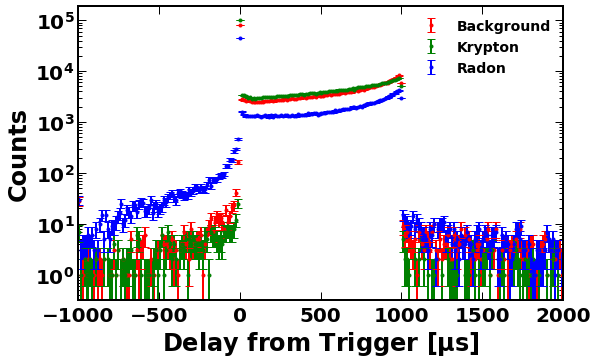

In [33]:
fig, ax = plt.subplots(figsize=(8.7, 5.4))
colours={'Radon': 'blue', 'Krypton': 'green', 'Background': 'red'}
for key, source in dict_results_sr1.items():
    hist='Trigger_Diff'
    x=source[hist]['binning']
    y=source[hist]['median']
    yerr_lower=source[hist]['lower']
    yerr_upper=source[hist]['upper']
    ax.errorbar(x=x, 
             y=y,
             yerr=[y-yerr_lower, yerr_upper-y],
             label=key, fmt='.',
             color=colours[key])
plt.xlim([_trig_min, _trig_max])
plt.legend(loc='best', fontsize=14)
plt.yscale('log')
plt.xlabel('Delay from Trigger [$\mu$s]')
plt.ylabel('Counts')
plt.show()

/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


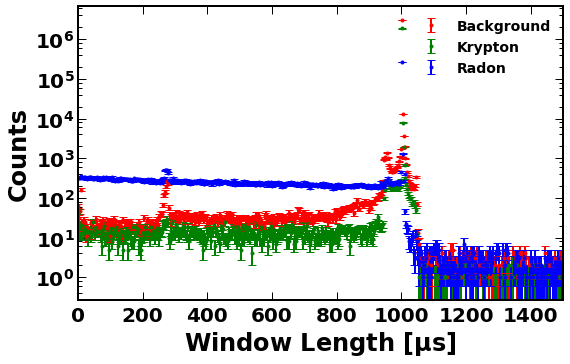

In [34]:
fig, ax = plt.subplots(figsize=(8.7, 5.4))
colours={'Radon': 'blue', 'Krypton': 'green', 'Background': 'red'}
for key, source in dict_results_sr1.items():
    hist='Window_Length'
    x=source[hist]['binning']
    y=source[hist]['median']
    yerr_lower=source[hist]['lower']
    yerr_upper=source[hist]['upper']
    ax.errorbar(x=x, 
             y=y,
             yerr=[y-yerr_lower, yerr_upper-y],
             label=key, fmt='.',
             color=colours[key])
plt.xlim([_wmin, _wmax])
plt.legend(loc='best', fontsize=14)
plt.yscale('log')
plt.xlabel('Window Length [$\mu$s]')
plt.ylabel('Counts')
plt.show()

### Peak Size

Investigate peak size distribution. Clearly peaks greater than 200 PE lie outside the scope of this work, but still attemp to understand at least

/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


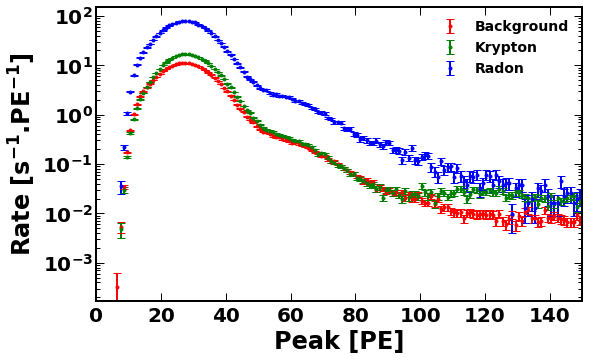

In [35]:
fig, ax = plt.subplots(figsize=(8.7, 5.4))
#Make Hists

for key, df in dict_source_sr1.items():
    #Only look at peask before the trigger
    df_unique = df.loc[df['time_before_trigger']>1]
    
    hist, binedges = np.histogram(df_unique['area'], bins=_pebin_space)
    
    #Confidence Bands
    bin_width = binedges[1:]-binedges[:-1]  #in ms
    bin_centers = binedges[:-1]+(binedges[1:]-binedges[:-1])/2
    y1=hist-np.sqrt(hist)
    y2=hist+np.sqrt(hist)

    #Correct for Livetime adn Binning
    hist=hist/dict_results_sr1[key]['Live-time']/bin_width
    y1 = y1/dict_results_sr1[key]['Live-time']/bin_width
    y2 = y2/dict_results_sr1[key]['Live-time']/bin_width
    
    ax.errorbar(x=bin_centers, 
             y=hist,
             yerr=[hist-y1, y2-hist],
             label=key, fmt='.',
             color=colours[key])

plt.legend(loc='best', fontsize=14)
plt.yscale('log')
plt.xlim([_pemin, _pemax])
plt.xlabel('Peak [PE]')
plt.ylabel('Rate [s$^{-1}$.PE$^{-1}$]')
plt.show()    

#### Comparison between peak size and S2 Width

Background


/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


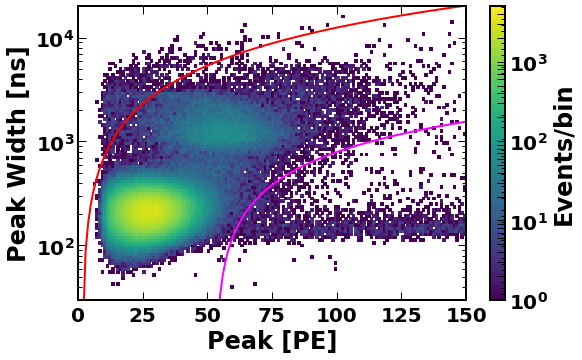

Krypton


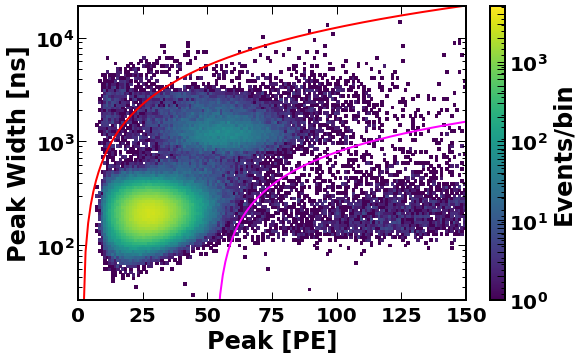

Radon


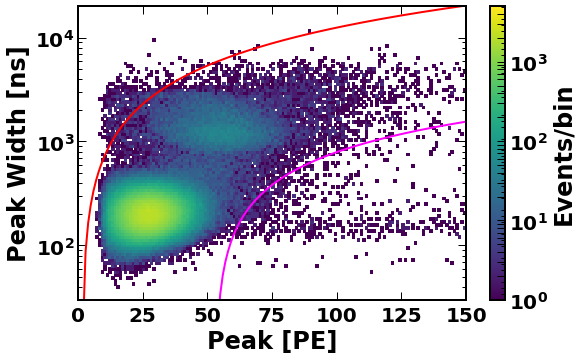

In [36]:
for key, df in dict_source_sr1.items():
    print(key)
    fig, ax = plt.subplots(figsize=(8.7, 5.4))
    
    df_unique = df.loc[df['time_before_trigger']>1]
    
    hist2d = Histdd (df_unique['area'],
                     df_unique['p_range_50p_area'], 
                     bins = [_pebin_space, _widthbin_space])
    
    hist2d.plot(norm=LogNorm(), cblabel='Events/bin', vmin=1, vmax= 5000)   
    
    plt.plot(_pebin_space, 50*_pebin_space**1.2-100, color='red')
    plt.plot(_pebin_space, 50*_pebin_space**0.8-1200, color='magenta')
    
    plt.yscale('log')
    plt.xlabel('Peak [PE]')
    plt.ylabel('Peak Width [ns]')
    plt.show()    

Background


/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


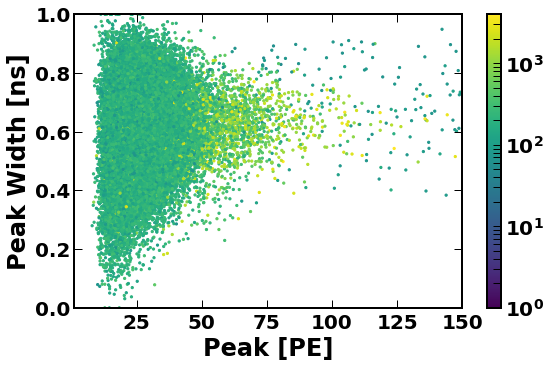

Krypton


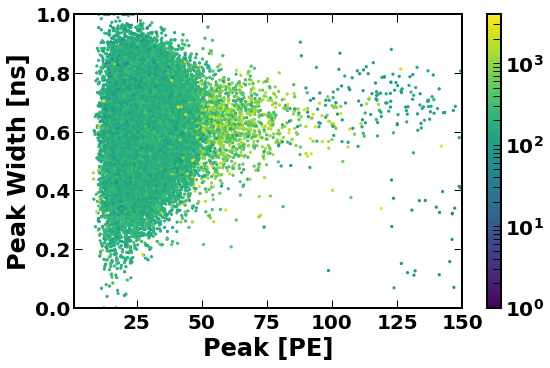

Radon


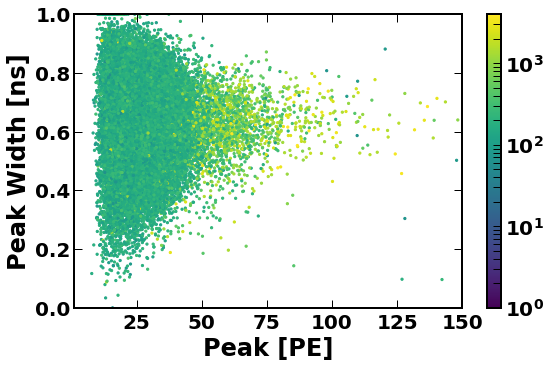

In [43]:
for key, df in dict_source_sr1.items():
    print(key)
    fig, ax = plt.subplots(figsize=(8.7, 5.4))
    
    df_unique = df.loc[df['time_before_trigger']>1]
    df_unique = df_unique.iloc[0:50000]
    
    plt.scatter(np.array(df_unique['area'].values),
                np.array(df_unique['area_fraction_top'].values),
                c=np.array(-df_unique['rise_time'].values),
                vmax=4000,
                vmin = 1,
                norm=LogNorm(),
                s = 5)
    
    plt.colorbar()
    plt.xlim([1, 150])
    plt.ylim([0, 1])
    #plt.yscale('log')
    plt.ylabel('Peak Width [ns]')
    plt.xlabel('Peak [PE]')
    plt.show()    

#### Comparison between peak size and S2AFT

Background


/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


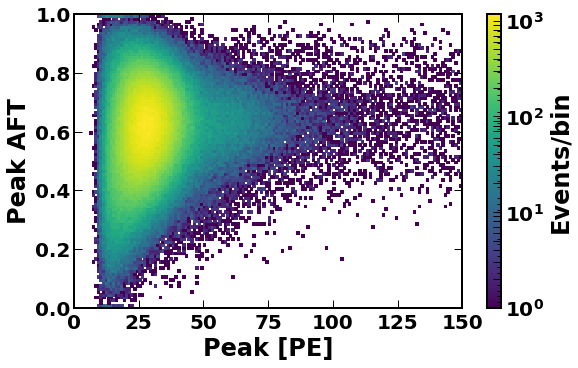

Krypton


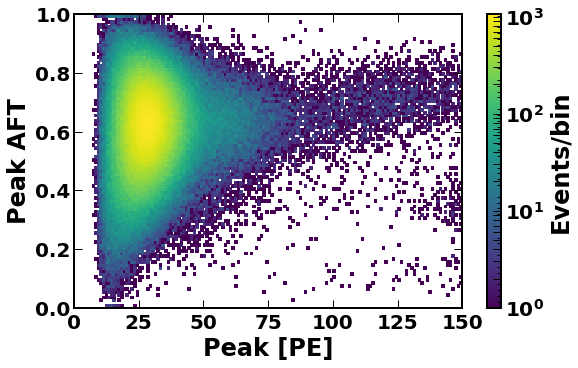

Radon


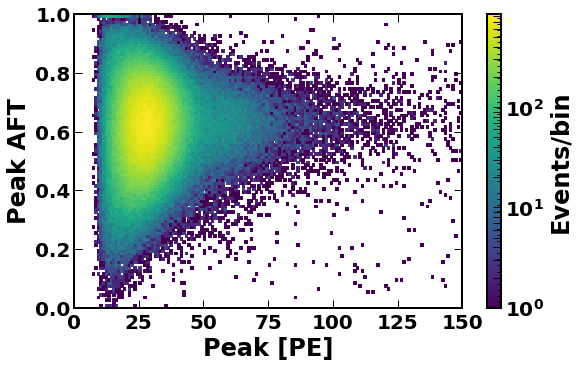

In [44]:
for key, df in dict_source_sr1.items():
    print(key)
    fig, ax = plt.subplots(figsize=(8.7, 5.4))
    
    df_unique = df.loc[df['time_before_trigger']>1]
    
    hist2d = Histdd (df_unique['area'],
                     df_unique['area_fraction_top'], 
                     bins = [_pebin_space, _aftbin_space])
    
    hist2d.plot(norm=LogNorm(), cblabel='Events/bin')

    plt.xlabel('Peak [PE]')
    plt.ylabel('Peak AFT')
    plt.show()    

#### Comparison between peak width and S2AFT

Background


/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


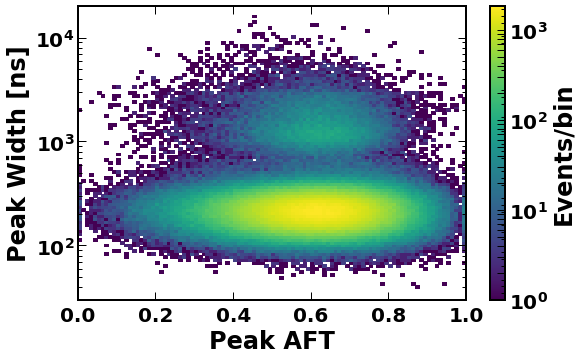

Krypton


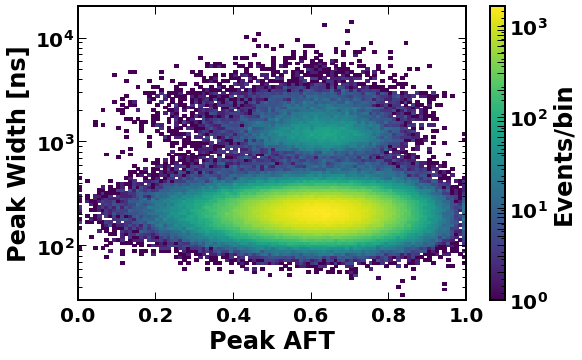

Radon


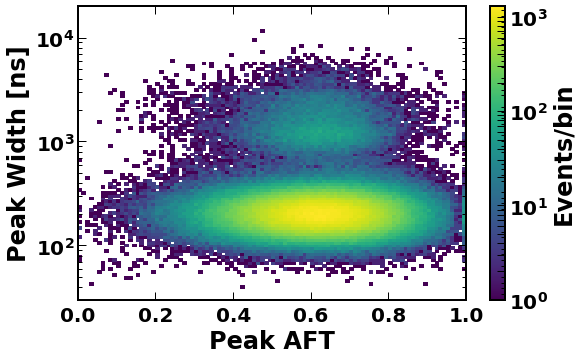

In [45]:
for key, df in dict_source_sr1.items():
    print(key)
    fig, ax = plt.subplots(figsize=(8.7, 5.4))
    
    df_unique = df.loc[df['time_before_trigger']>1]
    
    hist2d = Histdd (df_unique['area_fraction_top'],
                     df_unique['p_range_50p_area'],
                     bins = [_aftbin_space, _widthbin_space])
    
    hist2d.plot(norm=LogNorm(), cblabel='Events/bin')
    
    plt.xlabel('Peak AFT')
    plt.yscale('log')
    plt.ylabel('Peak Width [ns]')
    plt.show()    

Clearly we have to cut the anomolous constant-width/varying area, and small area/large width populations as these are some other distirbution

### Define and Apply Cut for Anomolous events

A double bounded cut in S2 are/S2 Width space should select our true SE events

In [46]:
def se_upper_bound (df):
    df['SE_cut'] = True & (df.p_range_50p_area < 50*df.area**1.2 - 100) & (df.p_range_50p_area > 50*df.area**0.8 - 1200)
    return df

Background


/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


TrueSECut selection: 3278 rows removed (99.54% passed)


/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/hax-2.5.0-py3.4.egg/hax/cuts.py:130: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  d.cut_history = prev_cuts + [passthrough_dict]
/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


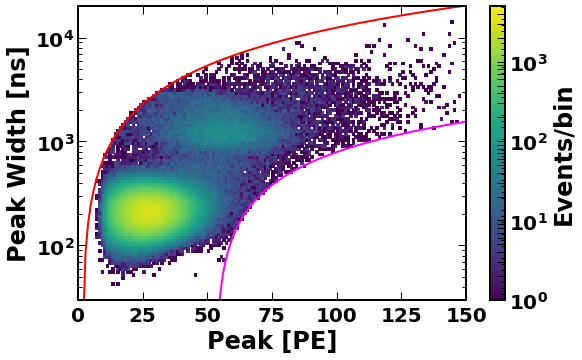

Krypton
TrueSECut selection: 3497 rows removed (99.41% passed)


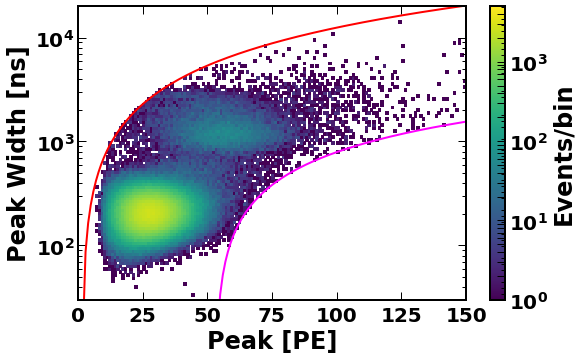

Radon
TrueSECut selection: 1303 rows removed (99.73% passed)


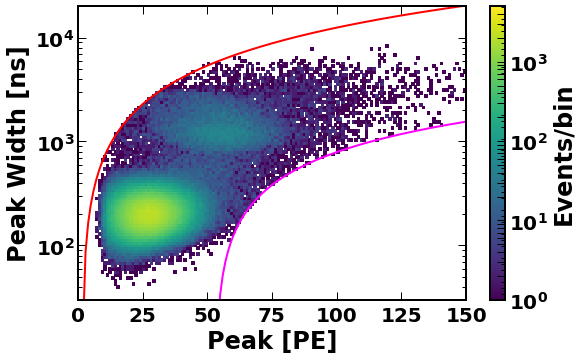

In [47]:
for key, df in dict_source_sr1.items():
    print(key)
    fig, ax = plt.subplots(figsize=(8.7, 5.4))
    
    df_unique = df.loc[df['time_before_trigger']>1]
    df_unique = se_upper_bound(df_unique)
    df_unique = hax.cuts.selection(df_unique, df_unique['SE_cut'], "TrueSECut")
    
    hist2d = Histdd (df_unique['area'],
                     df_unique['p_range_50p_area'], 
                     bins = [_pebin_space, _widthbin_space])
    
    hist2d.plot(norm=LogNorm(), cblabel='Events/bin', vmin=1, vmax= 5000)   
    
    plt.plot(_pebin_space, 50*_pebin_space**1.2-100, color='red')
    plt.plot(_pebin_space, 50*_pebin_space**0.8-1200, color='magenta')
    
    plt.yscale('log')
    plt.xlabel('Peak [PE]')
    plt.ylabel('Peak Width [ns]')
    plt.show()    

Update dfs with reduced datasets after TrueSE cut

In [48]:
dict_sources_cuts={}
for key, df in dict_source_sr1.items():
    print(key)
    df_unique = se_upper_bound(df)
    df_unique = df_unique.loc[df_unique['time_before_trigger']>1]
    df_unique = hax.cuts.selection(df_unique, df_unique['SE_cut'], "TrueSECut")
    dict_sources_cuts[key]=df_unique

Background
TrueSECut selection: 3278 rows removed (99.54% passed)
Krypton


/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/hax-2.5.0-py3.4.egg/hax/cuts.py:130: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  d.cut_history = prev_cuts + [passthrough_dict]


TrueSECut selection: 3497 rows removed (99.41% passed)
Radon
TrueSECut selection: 1303 rows removed (99.73% passed)


### Event distributions after applying cut

Inevstigate AFT plot to see if any effect of cut is visible.

Background


/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


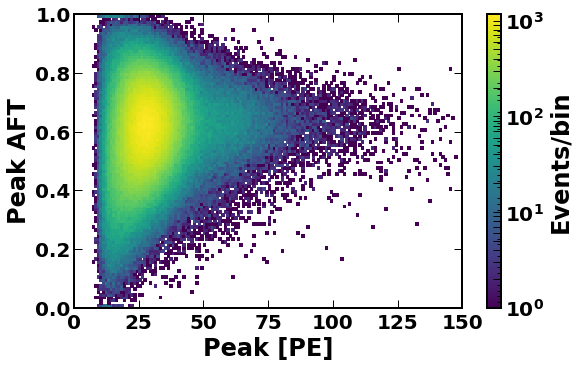

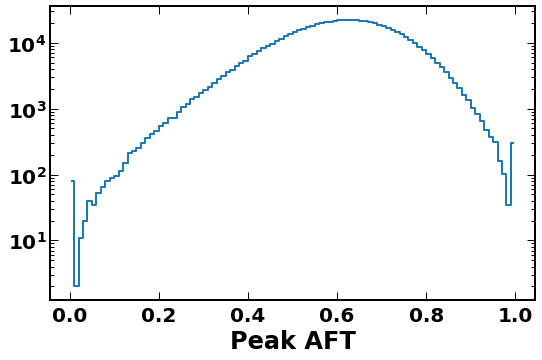

Krypton


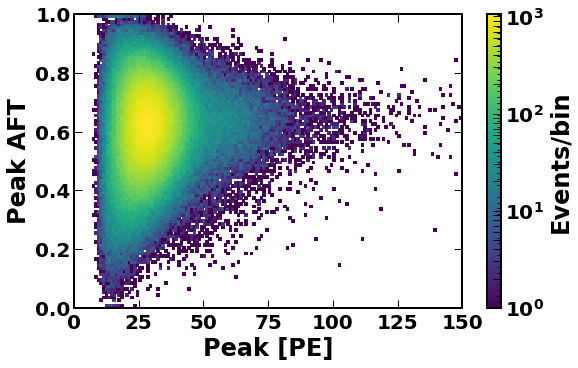

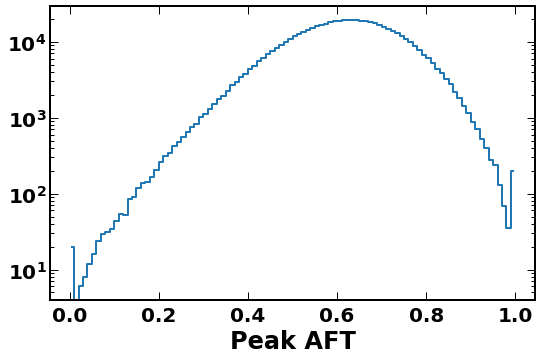

Radon


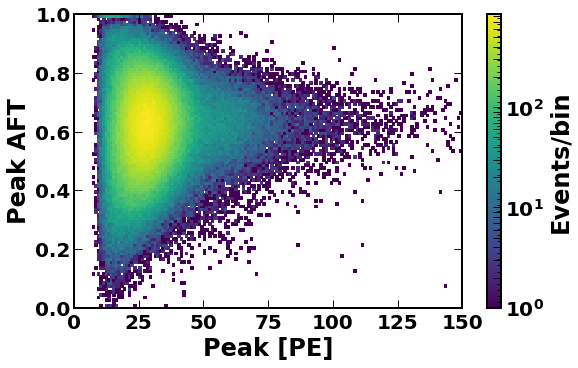

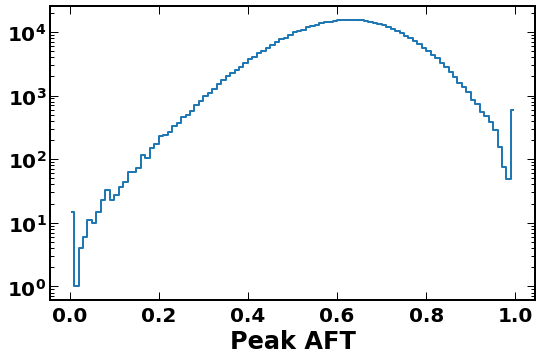

In [49]:
for key, df in dict_sources_cuts.items():
    print(key)
    fig, ax = plt.subplots(figsize=(8.7, 5.4))
    
    df_unique = df
    
    hist2d = Histdd (df_unique['area'],
                     df_unique['area_fraction_top'], 
                     bins = [_pebin_space, _aftbin_space], 
                    axis_names=['area', 'AFT'])
    
    hist2d.plot(norm=LogNorm(), cblabel='Events/bin')

    plt.xlabel('Peak [PE]')
    plt.ylabel('Peak AFT')
    plt.show()
    
    fig, ax = plt.subplots(figsize=(8.7, 5.4))
    hist1d = hist2d.sum('area')
    hist1d.plot()
    plt.xlabel('Peak AFT')
    plt.yscale('log')
    plt.show()

Seems pretty good, though there seems to be some excess at ~ 25 PE and AFT of 1. At 25 PE extremely unlikely to have AFT=1. Probably cut these events ?

In [52]:
for key, df in dict_sources_cuts.items():
    print(key)
    df = hax.cuts.selection(df, df['area_fraction_top']<1, "AFTCutUpper")
    df = hax.cuts.selection(df, df['area_fraction_top']>0, "AFTCutLower")
    dict_sources_cuts[key]=df

Background
AFTCutUpper selection: 302 rows removed (99.96% passed)


/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/hax-2.5.0-py3.4.egg/hax/cuts.py:130: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  d.cut_history = prev_cuts + [passthrough_dict]


AFTCutLower selection: 80 rows removed (99.99% passed)
Krypton
AFTCutUpper selection: 195 rows removed (99.97% passed)
AFTCutLower selection: 20 rows removed (100.00% passed)
Radon
AFTCutUpper selection: 591 rows removed (99.88% passed)
AFTCutLower selection: 15 rows removed (100.00% passed)


Not many events cuts by an AFT cut. Probably not necessary at all. Keeping it for now, just because. The resulting peak spectrum is given below

/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


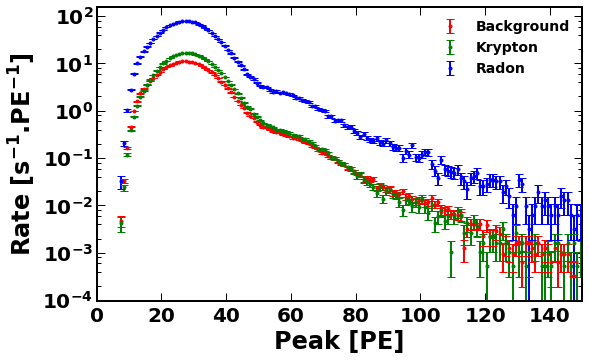

In [53]:
fig, ax = plt.subplots(figsize=(8.7, 5.4))
#Make Hists

for key, df in dict_sources_cuts.items():
    #Only look at peask before the trigger
    df_unique = df.loc[df['time_before_trigger']>1]
    
    hist, binedges = np.histogram(df_unique['area'], bins=_pebin_space)
    
    #Confidence Bands
    bin_width = binedges[1:]-binedges[:-1]  #in ms
    bin_centers = binedges[:-1]+(binedges[1:]-binedges[:-1])/2
    y1=hist-np.sqrt(hist)
    y2=hist+np.sqrt(hist)

    #Correct for Livetime adn Binning
    hist=hist/dict_results_sr1[key]['Live-time']/bin_width
    y1 = y1/dict_results_sr1[key]['Live-time']/bin_width
    y2 = y2/dict_results_sr1[key]['Live-time']/bin_width
    
    ax.errorbar(x=bin_centers, 
             y=hist,
             yerr=[hist-y1, y2-hist],
             label=key, fmt='.',
             color=colours[key])

plt.legend(loc='best', fontsize=14)
plt.yscale('log')
plt.xlim([_pemin, _pemax])
plt.xlabel('Peak [PE]')
plt.ylabel('Rate [s$^{-1}$.PE$^{-1}$]')
plt.show()    

Much better comparison. Could probably attempt to fit gaussian  SE model to this at this point?

### Investigate Spatial Behaviour of Spectrum

Plot below bins peaks into conecntric annuli of 10cm thickness

Background


/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


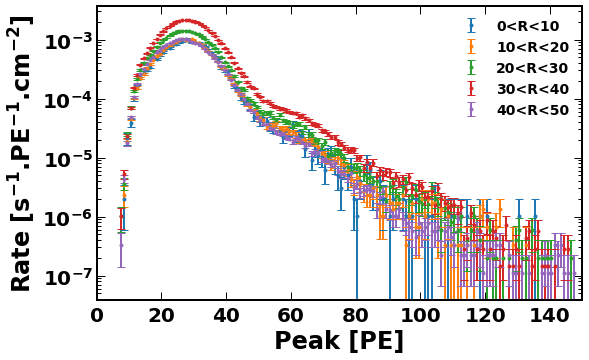

Krypton


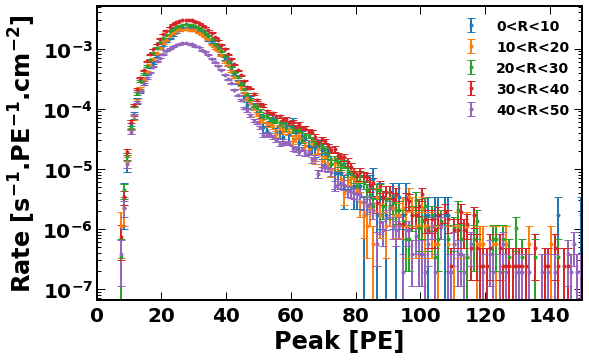

Radon


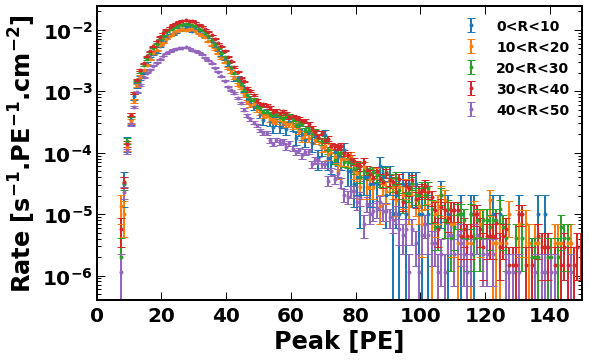

In [54]:
#Make Hists

r_annuli = np.linspace(0, 50, 6)

for key, df in dict_sources_cuts.items():
    print(key)
    fig, ax = plt.subplots(figsize=(8.7, 5.4))
    #Only look at peask before the trigger
    df_unique = df.loc[df['time_before_trigger']>1]
    df_unique['p_r'] = np.sqrt(df_unique['x_p_tpf']**2+df_unique['y_p_tpf']**2)
    
    for i, annulus in enumerate(r_annuli[1:]):
        df_temp = df_unique.loc[(df_unique['p_r']<annulus) &(df_unique['p_r']>r_annuli[i])]

        hist, binedges = np.histogram(df_temp['area'], bins=_pebin_space)

        #Confidence Bands
        bin_width = binedges[1:]-binedges[:-1]  #in ms
        bin_centers = binedges[:-1]+(binedges[1:]-binedges[:-1])/2
        y1=hist-np.sqrt(hist)
        y2=hist+np.sqrt(hist)
        
        #Area
        area = np.pi*(annulus**2-r_annuli[i]**2)
        
        #Correct for Livetime adn Binning
        hist=hist/dict_results_sr1[key]['Live-time']/bin_width/area
        y1 = y1/dict_results_sr1[key]['Live-time']/bin_width/area
        y2 = y2/dict_results_sr1[key]['Live-time']/bin_width/area

        ax.errorbar(x=bin_centers, 
                 y=hist,
                 yerr=[hist-y1, y2-hist],
                 label='%i<R<%i' %(r_annuli[i], annulus), fmt='.',)
                 #color=colours[key])

    plt.legend(loc='best', fontsize=14)
    plt.yscale('log')
    plt.xlim([_pemin, _pemax])
    plt.xlabel('Peak [PE]')
    plt.ylabel('Rate [s$^{-1}$.PE$^{-1}$.cm$^{-2}$]')
    plt.show()    

Consistently less events observed in outermost radial slice. Most likely explanation is field distortion effects. This cannot be corrected for as no drift time information.

Also check in quadrants.

Background


/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


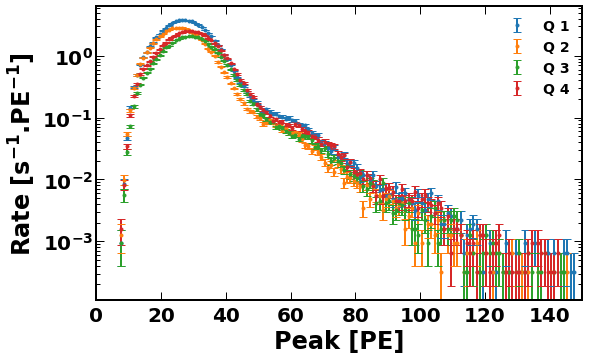

Krypton


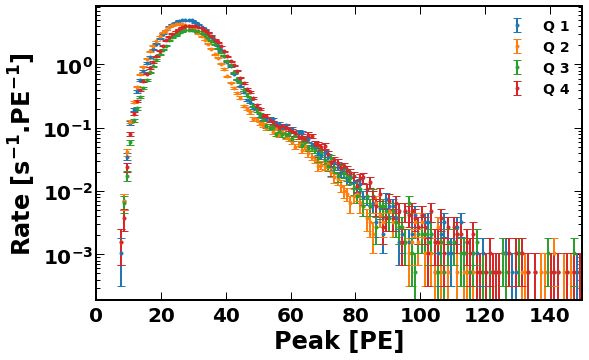

Radon


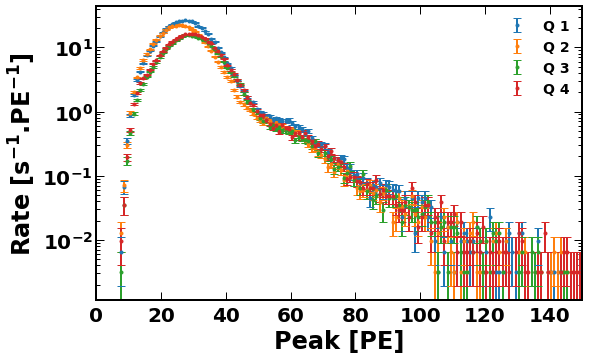

In [55]:
#Make Hists

quadrants=[[]]

for key, df in dict_sources_cuts.items():
    print(key)
    fig, ax = plt.subplots(figsize=(8.7, 5.4))
    #Only look at peask before the trigger
    df_unique = df.loc[df['time_before_trigger']>1]
    df_q1 = df_unique.loc[(df_unique['x_p_nn']>0) &(df_unique['y_p_nn']>0)]
    df_q2 = df_unique.loc[(df_unique['x_p_nn']<0) &(df_unique['y_p_nn']>0)]
    df_q3 = df_unique.loc[(df_unique['x_p_nn']<0) &(df_unique['y_p_nn']<0)]
    df_q4 = df_unique.loc[(df_unique['x_p_nn']>0) &(df_unique['y_p_nn']<0)]
    dfs_quadrants=[df_q1, df_q2, df_q3, df_q4]
    
    for i, df_temp in enumerate(dfs_quadrants):
        hist, binedges = np.histogram(df_temp['area'], bins=_pebin_space)

        #Confidence Bands
        bin_width = binedges[1:]-binedges[:-1]  #in ms
        bin_centers = binedges[:-1]+(binedges[1:]-binedges[:-1])/2
        y1=hist-np.sqrt(hist)
        y2=hist+np.sqrt(hist)
        
        #Correct for Livetime adn Binning
        hist=hist/dict_results_sr1[key]['Live-time']/bin_width
        y1 = y1/dict_results_sr1[key]['Live-time']/bin_width
        y2 = y2/dict_results_sr1[key]['Live-time']/bin_width

        ax.errorbar(x=bin_centers, 
                 y=hist,
                 yerr=[hist-y1, y2-hist],
                 label='Q %i' %(i+1), fmt='.',)
                 #color=colours[key])

    plt.legend(loc='best', fontsize=14)
    plt.yscale('log')
    plt.xlim([_pemin, _pemax])
    plt.xlabel('Peak [PE]')
    plt.ylabel('Rate [s$^{-1}$.PE$^{-1}$]')
    plt.show()    

Clear shift in mean SE peak in different regions, especially in Q2. Explanation: More broken PMTs here result in slightly lower SE mean. This implies we should implement a x-y dependant conversion from PEs to SE

## Fit Spectrum After Cuts to Gaussian Model for SE emission

In [56]:
from scipy.optimize import curve_fit
from scipy.stats import chisquare

def triple_gauss(x, a, xa, sigma_a, b, c, d, e):
    return a*np.exp(-(x-xa)**2/(2*sigma_a**2))+b*np.exp(-(x-2*xa)**2/(2*2*sigma_a**2))+c*np.exp(-(x-3*xa)**2/(2*3*sigma_a**2))+d*np.exp(-(x-4*xa)**2/(2*4*sigma_a**2))+e*np.exp(-(x-5*xa)**2/(2*5*sigma_a**2))


def fit_SE_spectrum(initial_guess, se_spectrum, sigma, bin_centers, bounds):
    #Fit
    popt, pcov = curve_fit(triple_gauss, bin_centers, se_spectrum, p0=initial_guess, absolute_sigma=True, sigma=sigma, bounds=bounds, max_nfev=2500)
        
    #Determine chi square
    counts_fitted = triple_gauss(bin_centers, *popt)
    f_goodness_of_fit = chisquare(se_spectrum, counts_fitted)     
        
    return popt, pcov, counts_fitted


Background


/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/scipy/optimize/minpack.py:666: RuntimeWarning: divide by zero encountered in true_divide
  weights = 1.0 / asarray(sigma) if sigma is not None else None


ValueError: Residuals are not finite in the initial point.

/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


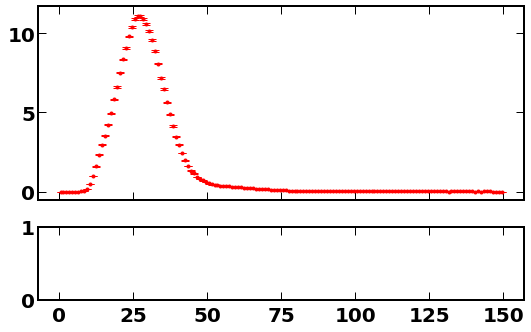

In [59]:
#Make Hists

_fitstart=20

for key, df in dict_sources_cuts.items():
    print(key)
    fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(8.7, 5.4), gridspec_kw = {'height_ratios':[8, 3]})
    #Only look at peask before the trigger
    df_unique = df.loc[df['time_before_trigger']>1]
    
    hist, binedges = np.histogram(df_unique['area'], bins=_pebin_space)
    
    #Confidence Bands
    bin_width = binedges[1:]-binedges[:-1]  #in ms
    bin_centers = binedges[:-1]+(binedges[1:]-binedges[:-1])/2
    y1=hist-np.sqrt(hist)
    y2=hist+np.sqrt(hist)

    #Correct for Livetime adn Binning
    hist=hist/dict_results_sr1[key]['Live-time']/bin_width
    y1 = y1/dict_results_sr1[key]['Live-time']/bin_width
    y2 = y2/dict_results_sr1[key]['Live-time']/bin_width
    
    ax1.errorbar(x=bin_centers, 
             y=hist,
             yerr=[hist-y1, y2-hist],
             label=key, fmt='.',
             color=colours[key])
    
    #Bounds on each element
    bounds=(0, np.inf)
    initial_guess=[100, 28, 7, 10, 0.1, 0.01, 0.01]
    fit_results = fit_SE_spectrum(initial_guess, hist[_fitstart:], 
                                  hist[_fitstart:]-y1[_fitstart:], bin_centers[_fitstart:], bounds)
    ax1.plot(bin_centers[_fitstart:], fit_results[2], linestyle=':', color='black', label='Fit')
    print(fit_results[0])
    ax1.legend(loc='best', fontsize=14)
    ax1.semilogy()
    ax1.set_ylim([2*10**-3, 2*10**2])
    ax1.set_ylabel('Rate [s$^{-1}$.PE$^{-1}$]')
    
    #Error
    num_value = fit_results[2]-hist[_fitstart:]
    denum_value = hist[_fitstart:]
    num_error = np.sqrt(fit_results[2]+hist[_fitstart:])
    denum_error = hist[_fitstart:]-y1[_fitstart:]
    e1 = num_error
    e2 = denum_error
    b1 = num_value
    b2 = denum_value
    w=b1/b2
    
    ratio_error = np.abs(((1-2*w)*e1*e1 + w*w*e2*e2)/(b2*b2))       
    ratio = num_value/denum_value 

    ax2.hlines(0, _pemin, _pemax, linestyle=':', color='black')
    ax2.plot(bin_centers[_fitstart:], ratio, marker='o', linewidth=0)
    ax2.set_ylim([-0.5, 0.5])
    ax2.set_ylabel('Residual')
    
    plt.xlim([_pemin, _pemax])
    plt.xlabel('Peak [PE]')
    fig.subplots_adjust(hspace=0)
    plt.show()    

## Produce SE Rate After S2 spectra and Implement Live-Time Dependent Cuts

### Live Time as a Function of Delay From primary S2

We need to determine how often we are recording a given SE in a time bin to correct for live-time effects.

In [63]:
#Make Hists

for key, df in dict_source_sr1.items():
    #Make sure not to double count event windows
    df_unique = df.drop_duplicates(subset=['run_number', 'event_number'])
    df_unique = df_unique.loc[(np.isnan(df_unique['1_delay'])==False)]
    
    #This has some binning effects right now due to rough approach
    hist, binedges = np.histogram(df_unique['1_delay']/milliseconds, 
                                  weights = (df_unique['window_length']/milliseconds),
                                  bins=_tbin_space)
    
   
    #Confidence Bands
    bin_width = binedges[1:]-binedges[:-1]  #in ms
    bin_centers = binedges[:-1]+(binedges[1:]-binedges[:-1])/2
    y1=hist-np.sqrt(hist)
    y2=hist+np.sqrt(hist)
    
    #Rescale bin content by bin width:
    hist = hist/bin_width
    y1 = y1/bin_width
    y2 = y2/bin_width
     
    events = len(df_unique)
    #Add results to dict
    dict_results_sr1[key]['Live Time Hist'] = {'binning': bin_centers, 'median': hist, 
                                               'upper': y2, 'lower': y1}

    

/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


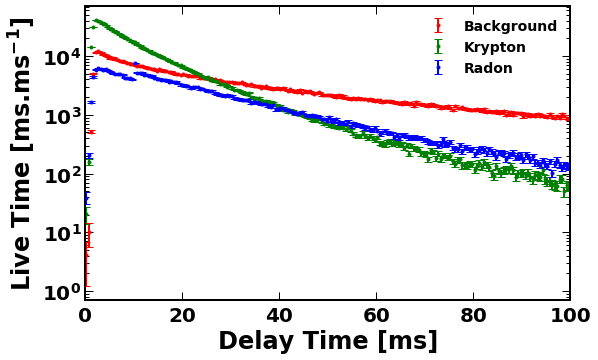

In [64]:
fig, ax = plt.subplots(figsize=(8.7, 5.4))
colours={'Radon': 'blue', 'Krypton': 'green', 'Background': 'red'}
for key, source in dict_results_sr1.items():
    hist='Live Time Hist'
    x=source[hist]['binning']
    y=source[hist]['median']
    yerr_lower=source[hist]['lower']
    yerr_upper=source[hist]['upper']
    ax.errorbar(x=x, 
             y=y,
             yerr=[y-yerr_lower, yerr_upper-y],
             label=key, fmt='.',
             color=colours[key])
plt.xlim([_tmin, _tmax])
plt.legend(loc='best', fontsize=14)
plt.yscale('log')
plt.xlabel('Delay Time [ms]')
plt.ylabel('Live Time [ms.ms$^{-1}$]')
plt.show()

### Delay of a given S2 from nearest Primary S2


Investigate decay time behaviour of SE populations from the persepctive of the SEs (Tianyu's approach). 

In [65]:
#Make Hists
dict_livetime={}

for key, df in dict_sources_cuts.items():
    df_unique = df.loc[(np.isnan(df['1_delay'])==False) &
                             (df['time_before_trigger']>1)]
    
    
    hist, binedges = np.histogram(df_unique['1_delay']/milliseconds, bins=_tbin_space)
    
    #Confidence Bands
    bin_width = (binedges[1:]-binedges[:-1])
    bin_centers = binedges[:-1]+(binedges[1:]-binedges[:-1])/2
    y1=hist/bin_width-np.sqrt(hist)/bin_width
    y2=hist/bin_width+np.sqrt(hist)/bin_width
    hist=hist/bin_width
    
    
    #Add results to dict
    dict_results_sr1[key]['Delay'] = {'binning': bin_centers, 'median': hist, 'upper': y2, 'lower': y1}
    

The raw SE rate, uncorrected for livetime, is given below

/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


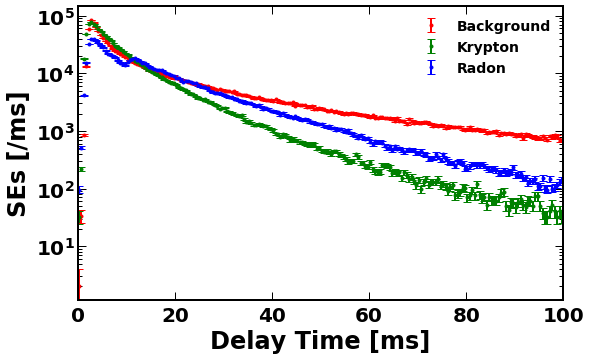

In [66]:
fig, ax = plt.subplots(figsize=(8.7, 5.4))
colours={'Radon': 'blue', 'Krypton': 'green', 'Background': 'red'}
for key, source in dict_results_sr1.items():
    hist='Delay'
    x=source[hist]['binning']
    y=source[hist]['median']
    yerr_lower=source[hist]['lower']
    yerr_upper=source[hist]['upper']
    ax.errorbar(x=x, 
             y=y,
             yerr=[y-yerr_lower, yerr_upper-y],
             label=key, fmt='.',
             color=colours[key])
plt.xlim([_tmin, _tmax])
plt.legend(loc='best', fontsize=14)
plt.yscale('log')
plt.xlabel('Delay Time [ms]')
plt.ylabel('SEs [/ms]')
plt.show()

The live time corrected rate, using the live time histogram from the previous section, is shown below.

/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


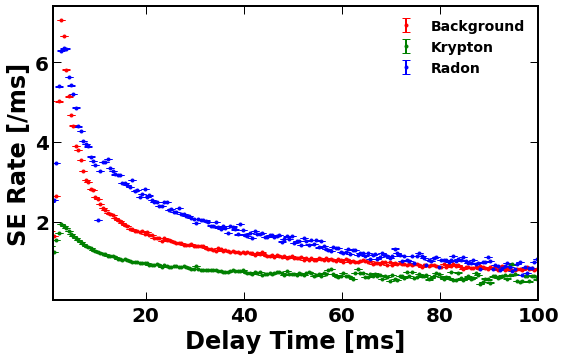

In [67]:
fig, ax = plt.subplots(figsize=(8.7, 5.4))
colours={'Radon': 'blue', 'Krypton': 'green', 'Background': 'red'}
for key, source in dict_results_sr1.items():
    #if key!='Background':
    #    continue

    x=source['Delay']['binning']
    
    #Error
    num_value=source['Delay']['median']
    denum_value=source['Live Time Hist']['median']
    num_error = source['Delay']['upper']-source['Delay']['median']
    denum_error = source['Live Time Hist']['upper']-source['Live Time Hist']['median']
    e1 = num_error
    e2 = denum_error
    b1 = num_value
    b2 = denum_value
    w=b1/b2
    
    ratio_error = np.abs(((1-2*w)*e1*e1 + w*w*e2*e2)/(b2*b2))       
    ratio = num_value/denum_value 
 
    ax.errorbar(x=x, 
             y=ratio,
             yerr=[ratio_error, ratio_error],
             label=key, fmt='.',
             color=colours[key])
plt.xlim([1, _tmax])
plt.legend(loc='best', fontsize=14)
#plt.yscale('log')
plt.xlabel('Delay Time [ms]')
plt.ylabel('SE Rate [/ms]')
plt.show()

### Spatial behaviour of SE Rate

Next we check the spatial behaviour of this decay to check for consistency

Background


/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


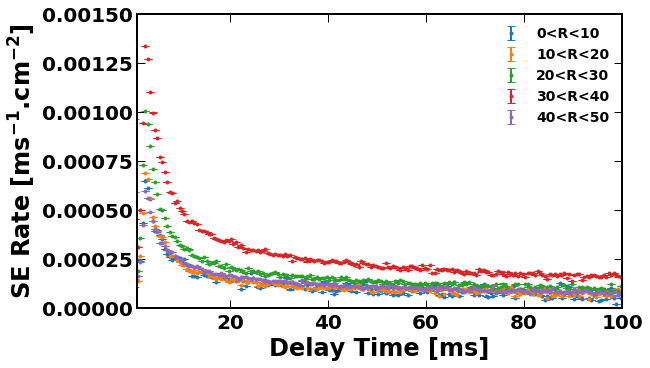

Krypton


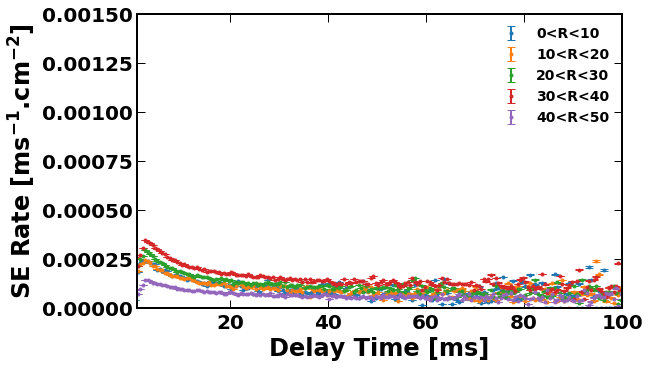

Radon


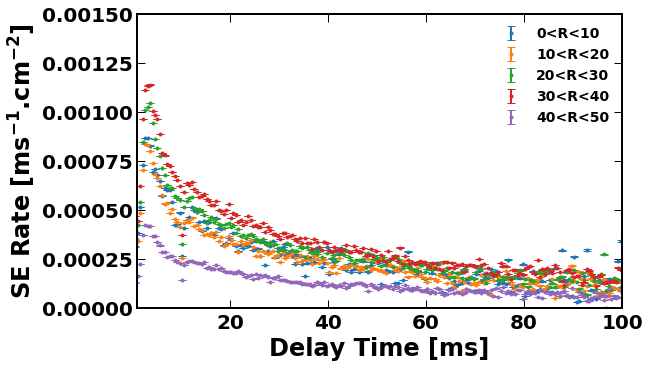

In [68]:
r_annuli = np.linspace(0, 50, 6)
#Make Hists
for key, df in dict_sources_cuts.items():
    print(key)
    #if key!='Background':
    #    continue
    df_unique = df.loc[(np.isnan(df['1_delay'])==False) &
                             (df['time_before_trigger']>1)]
    df_unique['p_r'] = np.sqrt(df_unique['x_p_tpf']**2+df_unique['y_p_tpf']**2)
    
    fig, ax = plt.subplots(figsize=(8.7, 5.4))
    for i, annulus in enumerate(r_annuli[1:]):
        df_temp = df_unique.loc[(df_unique['p_r']<annulus) &(df_unique['p_r']>r_annuli[i])]
    
        hist, binedges = np.histogram(df_temp['1_delay']/milliseconds, bins=_tbin_space)

        #Confidence Bands
        bin_width = (binedges[1:]-binedges[:-1])
        bin_centers = binedges[:-1]+(binedges[1:]-binedges[:-1])/2
        y1=hist/bin_width-np.sqrt(hist)/bin_width
        y2=hist/bin_width+np.sqrt(hist)/bin_width
        hist=hist/bin_width

        #Error
        num_value = hist
        denum_value = dict_results_sr1[key]['Live Time Hist']['median']
        num_error = y2-hist
        denum_error = dict_results_sr1[key]['Live Time Hist']['upper']-dict_results_sr1[key]['Live Time Hist']['median']
        e1 = num_error
        e2 = denum_error
        b1 = num_value
        b2 = denum_value
        w=b1/b2

        ratio_error = np.abs(((1-2*w)*e1*e1 + w*w*e2*e2)/(b2*b2))       
        ratio = num_value/denum_value 

        #Area
        area = np.pi*(annulus**2-r_annuli[i]**2)
        
        ax.errorbar(x=bin_centers, 
                 y=ratio/area,
                 yerr=[ratio_error/area, ratio_error/area],
                 label='%i<R<%i' %(r_annuli[i], annulus), fmt='.',)
                 #color=colours[key])

    plt.xlim([1, _tmax])
    plt.ylim([0, 0.0015])
    plt.legend(loc='best', fontsize=14)
    #plt.yscale('log')
    plt.xlabel('Delay Time [ms]')
    plt.ylabel('SE Rate [ms$^{-1}$.cm$^{-2}$]')
    plt.show()
     

More events in outer bin as expected (with outermost bin having the least). Again suspect due to field distortion pushing SE inwards. This would point to constant background being a bulk effect. Any otherway to disentangle a bulk vs non-bulk origin for these events?

Background


/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


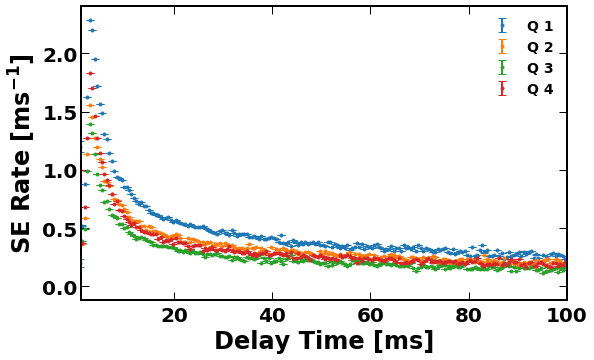

Krypton


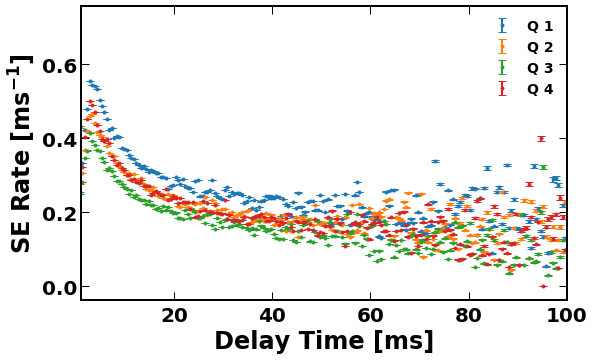

Radon


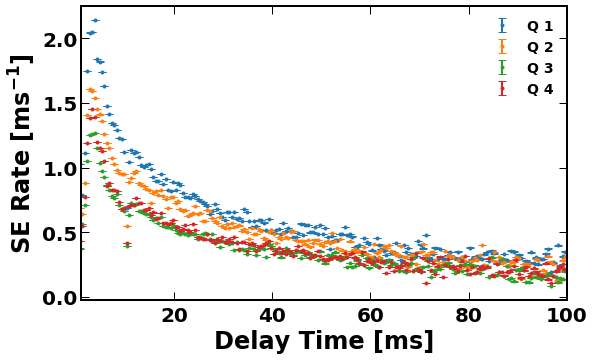

In [69]:
#Make Hists
for key, df in dict_sources_cuts.items():
    print(key)
    #if key!='Background':
    #    continue
    df_unique = df.loc[(np.isnan(df['1_delay'])==False) &
                             (df['time_before_trigger']>1)]
    df_q1 = df_unique.loc[(df_unique['x_p_nn']>0) &(df_unique['y_p_nn']>0)]
    df_q2 = df_unique.loc[(df_unique['x_p_nn']<0) &(df_unique['y_p_nn']>0)]
    df_q3 = df_unique.loc[(df_unique['x_p_nn']<0) &(df_unique['y_p_nn']<0)]
    df_q4 = df_unique.loc[(df_unique['x_p_nn']>0) &(df_unique['y_p_nn']<0)]
    dfs_quadrants=[df_q1, df_q2, df_q3, df_q4]
    
    fig, ax = plt.subplots(figsize=(8.7, 5.4))
    for i, df_temp in enumerate(dfs_quadrants):  
        hist, binedges = np.histogram(df_temp['1_delay']/milliseconds, bins=_tbin_space)

        #Confidence Bands
        bin_width = (binedges[1:]-binedges[:-1])
        bin_centers = binedges[:-1]+(binedges[1:]-binedges[:-1])/2
        y1=hist/bin_width-np.sqrt(hist)/bin_width
        y2=hist/bin_width+np.sqrt(hist)/bin_width
        hist=hist/bin_width

        #Error
        num_value = hist
        denum_value = dict_results_sr1[key]['Live Time Hist']['median']
        num_error = y2-hist
        denum_error = dict_results_sr1[key]['Live Time Hist']['upper']-dict_results_sr1[key]['Live Time Hist']['median']
        e1 = num_error
        e2 = denum_error
        b1 = num_value
        b2 = denum_value
        w=b1/b2

        ratio_error = np.abs(((1-2*w)*e1*e1 + w*w*e2*e2)/(b2*b2))       
        ratio = num_value/denum_value 
       
        ax.errorbar(x=bin_centers, 
                 y=ratio,
                 yerr=[ratio_error, ratio_error],
                 label='Q %i' %(i+1), fmt='.',)
                 #color=colours[key])

    plt.xlim([1, _tmax])
    plt.legend(loc='best', fontsize=14)
    #plt.yscale('log')
    plt.xlabel('Delay Time [ms]')
    plt.ylabel('SE Rate [ms$^{-1}$]')
    plt.show()
     

Not clear to me why Q1 would have higher SE rates than others (and conversely why Q4 would be lower.) Could warping of meshes explain this?

### Check behaviour of 1e, 2e, 3e etc populations

Background


/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


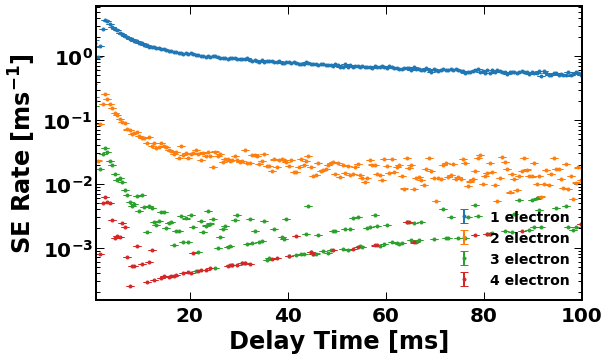

Krypton


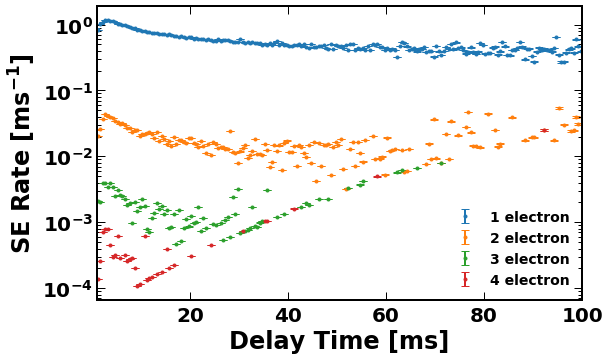

Radon


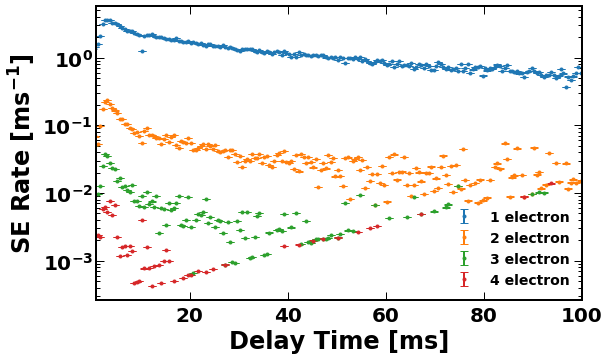

In [70]:
#Make Hists
for key, df in dict_sources_cuts.items():
    print(key)
    #if key!='Background':
    #    continue
    df_unique = df.loc[(np.isnan(df['1_delay'])==False) &
                             (df['time_before_trigger']>1)]
    df_1e = df_unique.loc[(df_unique['area']>21) &(df_unique['area']<35)]
    df_2e = df_unique.loc[(df_unique['area']>49) &(df_unique['area']<63)]
    df_3e = df_unique.loc[(df_unique['area']>77) &(df_unique['area']<91)]
    df_4e = df_unique.loc[(df_unique['area']>105) &(df_unique['area']<119)]
    dfs_quadrants=[df_1e, df_2e, df_3e, df_4e]
    
    fig, ax = plt.subplots(figsize=(8.7, 5.4))
    for i, df_temp in enumerate(dfs_quadrants):  
        hist, binedges = np.histogram(df_temp['1_delay']/milliseconds, bins=_tbin_space)

        #Confidence Bands
        bin_width = (binedges[1:]-binedges[:-1])
        bin_centers = binedges[:-1]+(binedges[1:]-binedges[:-1])/2
        y1=hist/bin_width-np.sqrt(hist)/bin_width
        y2=hist/bin_width+np.sqrt(hist)/bin_width
        hist=hist/bin_width

        #Error
        num_value = hist
        denum_value = dict_results_sr1[key]['Live Time Hist']['median']
        num_error = y2-hist
        denum_error = dict_results_sr1[key]['Live Time Hist']['upper']-dict_results_sr1[key]['Live Time Hist']['median']
        e1 = num_error
        e2 = denum_error
        b1 = num_value
        b2 = denum_value
        w=b1/b2

        ratio_error = np.abs(((1-2*w)*e1*e1 + w*w*e2*e2)/(b2*b2))       
        ratio = num_value/denum_value 
       
        ax.errorbar(x=bin_centers, 
                 y=ratio,
                 yerr=[ratio_error, ratio_error],
                 label='%i electron' %(i+1), fmt='.',)
                 #color=colours[key])

    plt.xlim([1, _tmax])
    plt.legend(loc='best', fontsize=14)
    plt.yscale('log')
    plt.xlabel('Delay Time [ms]')
    plt.ylabel('SE Rate [ms$^{-1}$]')
    plt.show()
     

Clearly 1 and 2 electron populations follow the same temporal behaviour. There really isn't enough statistics to say anything about 3 and 4 electron populations, though there is probably a something there.

## Implement Cut Dependent on S2 size and Time

Cut on time since primary s2 such that remaining trapped electrons is less than some value. Use the "worst case" scenario form fitting results (in fitting notebook). 

In [71]:
tau=7.9
scaling_constant=2.73e-05

Background


/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


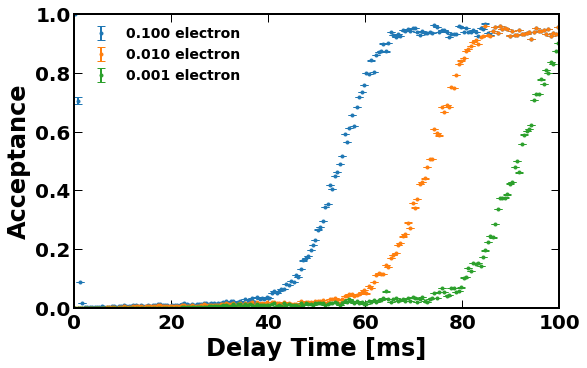

Krypton


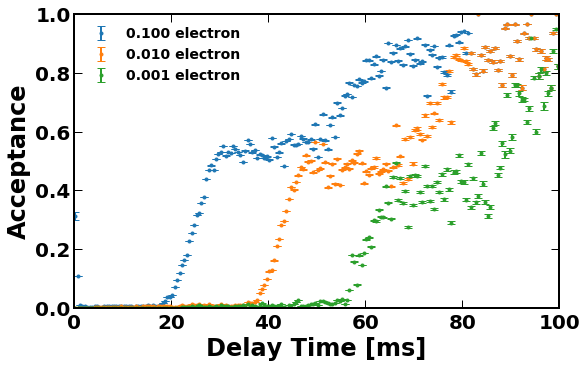

Radon


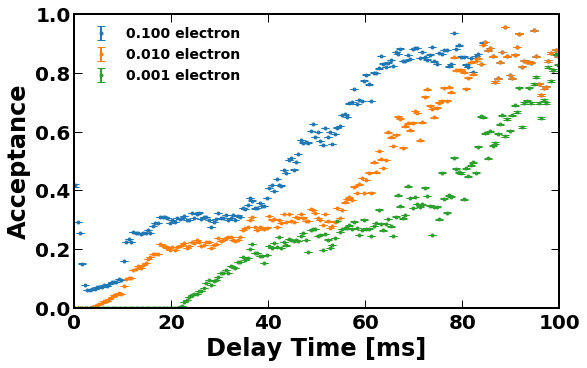

In [72]:
colours={'Radon': 'blue', 'Krypton': 'green', 'Background': 'red'}

for key, df in dict_sources_cuts.items():
    #if key != 'Background':
    #    continue
    print(key)

    df_unique = df.loc[(np.isnan(df['1_delay'])==False) & (df['time_before_trigger']>1)]
    
    #All Peaks Hist
    hist, binedges = np.histogram(df_unique['1_delay']/milliseconds, bins=_tbin_space) 
    
    df_10 = df_unique[(tau*np.log(scaling_constant*tau*df_unique['1_s2']/(0.1)))<df_unique['1_delay']/milliseconds]
    df_100 =  df_unique[(tau*np.log(scaling_constant*tau*df_unique['1_s2']/(0.01)))<df_unique['1_delay']/milliseconds]
    df_1000 =  df_unique[(tau*np.log(scaling_constant*tau*df_unique['1_s2']/(0.001)))<df_unique['1_delay']/milliseconds]
    dfs_quadrants=[df_10, df_100, df_1000]
    
    fig, ax = plt.subplots(figsize=(8.7, 5.4))
    for i, df_temp in enumerate(dfs_quadrants):  
        #Peaks after cut
        hist_cut, binedges = np.histogram(df_temp['1_delay']/milliseconds, bins=_tbin_space) 
        bin_width = (binedges[1:]-binedges[:-1])
        bin_centers = binedges[:-1]+(binedges[1:]-binedges[:-1])/2
        
        #Error
        num_value=np.array(hist_cut)
        denum_value=np.array(hist)
        num_error = np.sqrt(hist_cut)
        denum_error = np.sqrt(hist)
        e1 = num_error
        e2 = denum_error
        b1 = num_value
        b2 = denum_value
        w=b1/b2

        ratio_error = np.abs(((1-2*w)*e1*e1 + w*w*e2*e2)/(b2*b2))       
        ratio = num_value/denum_value 
        
        ax.errorbar(x=bin_centers, 
                 y=ratio,
                 yerr=[ratio_error, ratio_error],
                 label='%.3f electron' %(1/10**(i+1)), fmt='.',)
    
    plt.xlim([_tmin, _tmax])
    plt.ylim([0, 1])
    plt.legend(loc='best', fontsize=14)
    #plt.yscale('log')
    plt.xlabel('Delay Time [ms]')
    plt.ylabel('Acceptance')
    plt.show()



Above is pretty straightforward, i.e. longer delay time implies higher acceptance with some variation depending on amount of alphas in the data versus other energies

Background


/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


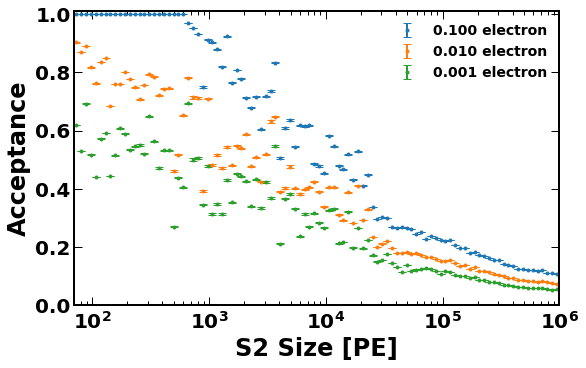

Krypton


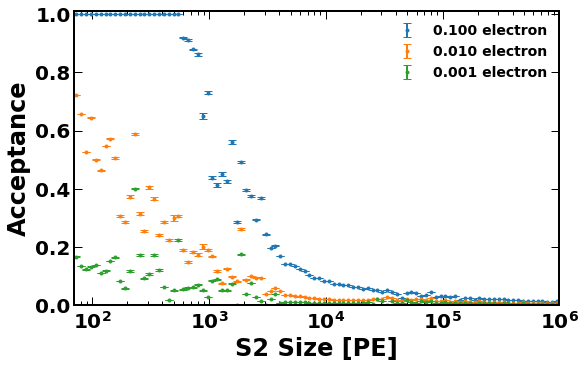

Radon


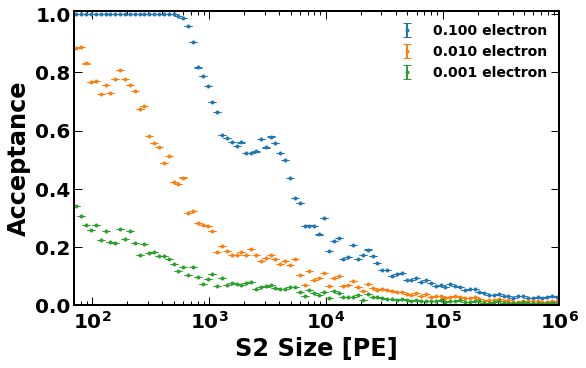

In [73]:
for key, df in dict_sources_cuts.items():
    #if key != 'Background':
    #    continue
    print(key)
    
    df_unique = df.loc[(np.isnan(df['1_delay'])==False) & (df['time_before_trigger']>1)]
    
    #All Peaks Hist
    hist, binedges = np.histogram(df_unique['1_s2'].dropna(), bins=_s2bin_space) 
    
    df_10 = df_unique[(tau*np.log(scaling_constant*tau*df_unique['1_s2']/(0.1)))<df_unique['1_delay']/milliseconds]
    df_100 =  df_unique[(tau*np.log(scaling_constant*tau*df_unique['1_s2']/(0.01)))<df_unique['1_delay']/milliseconds]
    df_1000 =  df_unique[(tau*np.log(scaling_constant*tau*df_unique['1_s2']/(0.001)))<df_unique['1_delay']/milliseconds]
    dfs_quadrants=[df_10, df_100, df_1000]
    
    fig, ax = plt.subplots(figsize=(8.7, 5.4))
    for i, df_temp in enumerate(dfs_quadrants):  
     
        ##Peaks After Cuts
        (hist_cut, binedges) = np.histogram(df_temp['1_s2'], bins=_s2bin_space)
        bin_width = (binedges[1:]-binedges[:-1])
        bin_centers = binedges[:-1]+(binedges[1:]-binedges[:-1])/2

        #Error
        num_value=np.array(hist_cut)
        denum_value=np.array(hist)
        num_error = np.sqrt(hist_cut)
        denum_error = np.sqrt(hist)
        e1 = num_error
        e2 = denum_error
        b1 = num_value
        b2 = denum_value
        w=b1/b2
    
        ratio_error = np.abs(((1-2*w)*e1*e1 + w*w*e2*e2)/(b2*b2))       
        ratio = num_value/denum_value
        
        ax.errorbar(x=bin_centers, 
                 y=ratio,
                 yerr=[ratio_error, ratio_error],
                 label='%.3f electron' %(1/10**(i+1)), fmt='.',)
    
    plt.xlim([10**_s2min, 10**_s2max])
    plt.xscale('log')
    plt.ylim([0, 1.01])
    plt.legend(loc='best', fontsize=14)
    plt.xscale('log')
    plt.xlabel('S2 Size [PE]')
    plt.ylabel('Acceptance')
    plt.show()



Again this makes sense. very rarely do we have long enough of a window after an alpha for example to accept a SE.

Background


/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/ipykernel/__main__.py:33: RuntimeWarning: invalid value encountered in true_divide
/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/ipykernel/__main__.py:36: RuntimeWarning: invalid value encountered in true_divide
/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


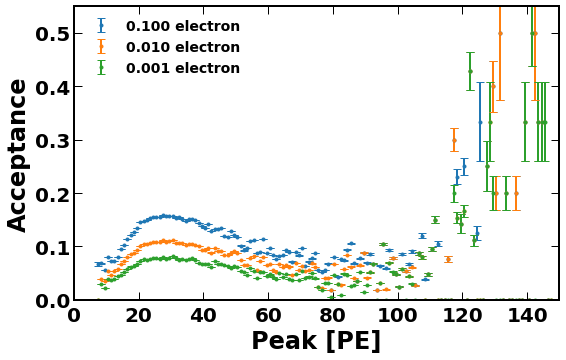

Krypton


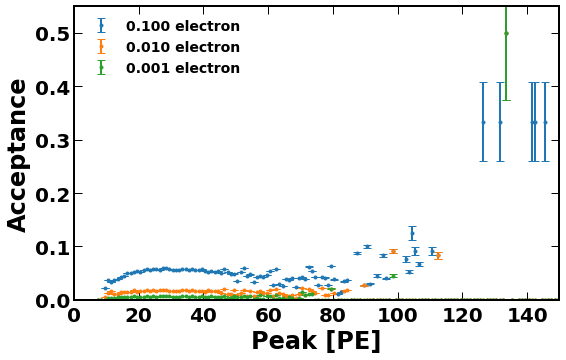

Radon


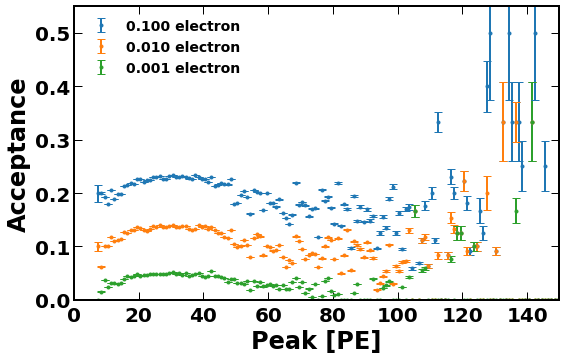

In [74]:
for key, df in dict_sources_cuts.items():
    #if key != 'Background':
    #    continue
    print(key)
    
    df_unique = df.loc[(np.isnan(df['1_delay'])==False) & (df['time_before_trigger']>1)]
    
    #All Peaks Hist
    hist, binedges = np.histogram(df_unique['area'].dropna(), bins=_pebin_space) 
    
    df_10 = df_unique[(tau*np.log(scaling_constant*tau*df_unique['1_s2']/(0.1)))<df_unique['1_delay']/milliseconds]
    df_100 =  df_unique[(tau*np.log(scaling_constant*tau*df_unique['1_s2']/(0.01)))<df_unique['1_delay']/milliseconds]
    df_1000 =  df_unique[(tau*np.log(scaling_constant*tau*df_unique['1_s2']/(0.001)))<df_unique['1_delay']/milliseconds]
    dfs_quadrants=[df_10, df_100, df_1000]
    
    fig, ax = plt.subplots(figsize=(8.7, 5.4))
    for i, df_temp in enumerate(dfs_quadrants):  
     
        ##Peaks After Cuts
        (hist_cut, binedges) = np.histogram(df_temp['area'], bins=_pebin_space)
        bin_width = (binedges[1:]-binedges[:-1])
        bin_centers = binedges[:-1]+(binedges[1:]-binedges[:-1])/2

        #Error
        num_value=np.array(hist_cut)
        denum_value=np.array(hist)
        num_error = np.sqrt(hist_cut)
        denum_error = np.sqrt(hist)
        e1 = num_error
        e2 = denum_error
        b1 = num_value
        b2 = denum_value
        w=b1/b2
    
        ratio_error = np.abs(((1-2*w)*e1*e1 + w*w*e2*e2)/(b2*b2))       
        ratio = num_value/denum_value
        
        ax.errorbar(x=bin_centers, 
                 y=ratio,
                 yerr=[ratio_error, ratio_error],
                 label='%.3f electron' %(1/10**(i+1)), fmt='.',)
    
    plt.xlim([_pemin, _pemax])
    plt.ylim([0, 0.55])
    plt.legend(loc='best', fontsize=14)
    plt.xlabel('Peak [PE]')
    plt.ylabel('Acceptance')
    plt.show()



Mmh. This might bear some thought. However, first thoughts, 1 and 2 electron acceptance seems equally good. Distinct drop in 3 electrons for background (Why?). Increasing acceptance for 4 and 5 electrons. Probably indicates these are uncorrelated to primary S2. Also 4 and 5 electrons are very likely to be triggers in and off them selves. 

## Temporal Dependence on 2nd/3rd/4th Preceding S2s.

Background


/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/ipykernel/__main__.py:58: RuntimeWarning: invalid value encountered in true_divide
/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/ipykernel/__main__.py:61: RuntimeWarning: invalid value encountered in true_divide
/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


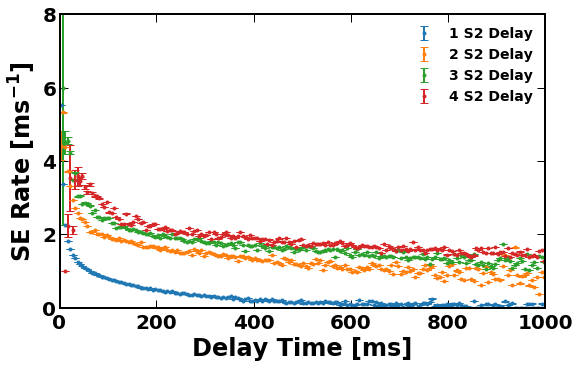

In [76]:
colours={1: 'blue', 2: 'green', 3: 'red', 4: 'magenta'}

for key, df in dict_sources_cuts.items():
    if key!='Background':
        continue

    print(key)
    
    #Histogram with data quality cuts applied
    df_unique = df.loc[(np.isnan(df['1_delay'])==False) &
                             (df['time_before_trigger']>1)]
    
    #Histogram without cuts for livetime calculations
    df_all = dict_source_sr1[key]
    df_all = df_all.drop_duplicates(subset=['run_number', 'event_number'])
    #df_all = df_all.loc[(df_all['time_before_trigger']>1)]
   
    fig, ax = plt.subplots(figsize=(8.7, 5.4))
    for int_type in range(1, 5):
        
        #Hitsogram with rates
        hist, binedges = np.histogram(df_unique['%i_delay' %int_type].dropna().values/milliseconds,
                                      bins=_tbin_ext_space)    

        #Confidence Bands
        bin_width = (binedges[1:]-binedges[:-1])
        bin_centers = binedges[:-1]+(binedges[1:]-binedges[:-1])/2
        y1=hist/bin_width-np.sqrt(hist)/bin_width
        y2=hist/bin_width+np.sqrt(hist)/bin_width
        hist=hist/bin_width

        #Histogram with livetime
        df_all_temp = df_all.loc[(np.isnan(df_all['%i_delay' %int_type])==False)]
        hist_livetime, binedges = np.histogram(df_all_temp['%i_delay' %int_type]/milliseconds, 
                                  weights = (df_all_temp['window_length']/milliseconds),
                                  bins=_tbin_ext_space)
    
   
        #Confidence Bands
        y1_livetime=hist_livetime-np.sqrt(hist_livetime)
        y2_livetime=hist_livetime+np.sqrt(hist_livetime)
    
        #Rescale bin content by bin width:
        hist_livetime = hist_livetime/bin_width
        y1_livetime = y1_livetime/bin_width
        y2_livetime = y2_livetime/bin_width
        
        
        #Error
        num_value = hist
        denum_value = hist_livetime
        num_error = y2-hist
        denum_error = y2_livetime-hist_livetime
        e1 = num_error
        e2 = denum_error
        b1 = num_value
        b2 = denum_value
        w=b1/b2

        ratio_error = np.abs(((1-2*w)*e1*e1 + w*w*e2*e2)/(b2*b2))       
        ratio = num_value/denum_value 
       
        ax.errorbar(x=bin_centers, 
                 y=ratio,
                 yerr=[ratio_error, ratio_error],
                 label='%i S2 Delay' %(int_type), fmt='.',)
                 #color=colours[key])

    plt.xlim([1, _tmax_ext])
    plt.legend(loc='best', fontsize=14)
    plt.ylim([0, 8])
    plt.xlabel('Delay Time [ms]')
    plt.ylabel('SE Rate [ms$^{-1}$]')
    plt.show()

Does this say anuything? One would expect deacying behaviour in tens of millisecond following "2nd previous" etc primary due to even closer proximity to S2 directly precedingthe relevant SE peak.  Only question why is the rate of 2nd/3rd/4th previous double that of rate with only respct to primary? Am I making a binning error in my histograms? Or is the primary S2 rate actually suppressed? There is a hint of increasing behaviour to longer delay.

Could failure to record waveforms with zero peaks be the culprit? I.e. live time calculation is wrong? Have to redo minitrees. After thiking suspect this will pull all rates down at larger times (more likely to record waveform with no SE, due to decay of trapped electron population.) Check with fixed minitrees!

Have to re-calculate live time at this point as we are excluding events.

Radon


/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


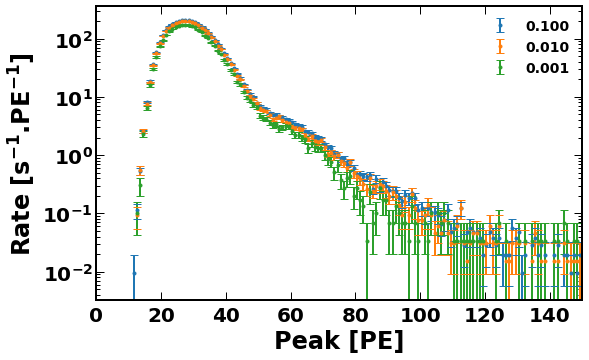

Background


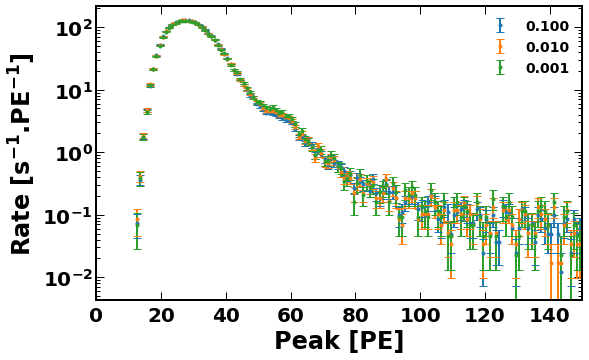

Krypton


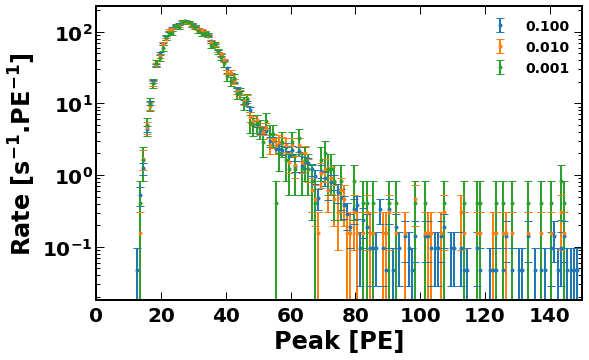

In [38]:
colours={'Radon': 'blue', 'Krypton': 'green', 'Background': 'red'}

electrons=[0.1, 0.01, 0.001]
for key, df in dict_sources_cuts.items():
    print(key)
    
    df_all = dict_source_sr1[key]
    df_all = df_all.drop_duplicates(subset=['run_number', 'event_number'])
    df_all = df_all.loc[(df_all['time_before_trigger']>1)]
    
    fig, ax = plt.subplots(figsize=(8.7, 5.4))
    for electron in electrons:
        #Apply Cut
        df_temp=df.loc[(tau*np.log(scaling_constant*tau*df['1_s2']/(electron)))<df['1_delay']/milliseconds]
        df_all_temp=df_all.loc[(tau*np.log(scaling_constant*tau*df_all['1_s2']/(electron)))<df_all['1_delay']/milliseconds]
        
        #Re-Calculate Livetime
        live_time = np.sum(df_all_temp['time_before_trigger']/10**9)
        
        #Make Hist
        hist, binedges = np.histogram(df_temp['area'].dropna().values, bins=_pebin_space)    

        #Confidence Bands
        bin_width = binedges[1:]-binedges[:-1]  #in ms
        bin_centers = binedges[:-1]+(binedges[1:]-binedges[:-1])/2
        y1=hist-np.sqrt(hist)
        y2=hist+np.sqrt(hist)

        #Correct for Livetime and Binning
        hist=hist/live_time/bin_width
        y1 = y1/live_time/bin_width
        y2 = y2/live_time/bin_width

        ax.errorbar(x=bin_centers, 
                 y=hist,
                 yerr=[hist-y1, y2-hist],
                 label='%.3f electrons' %electron, fmt='.')


    plt.xlim([_pemin, _pemax])
    plt.legend(loc='best', fontsize=14)
    plt.yscale('log')
    plt.xlabel('Peak [PE]')
    plt.ylabel('Rate [s$^{-1}$.PE$^{-1}$]')
    plt.show()



Uhm.... Ok

Let see what this looks like when compared to an SE rate in dru-ish units.

Radon
 Time Cut: 40 ms, Live Time:  105.27 s, Exposure:  2.35 kg.day, Total Rate: 3539.23
 Time Cut: 40 ms, Live Time:  65.06 s, Exposure:  1.45 kg.day, Total Rate: 3386.46
 Time Cut: 40 ms, Live Time:  29.72 s, Exposure:  0.66 kg.day, Total Rate: 2863.94


/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


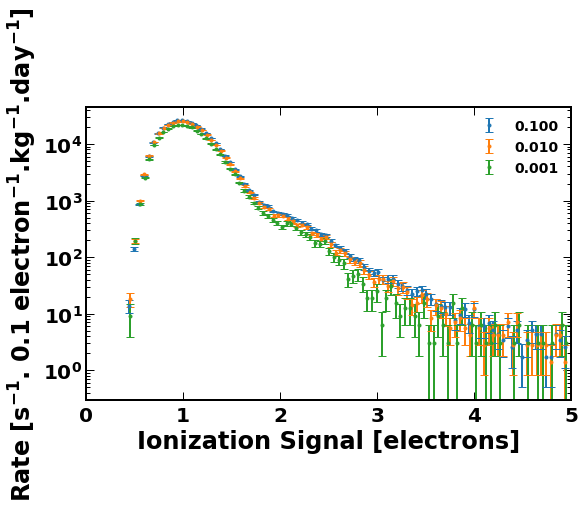

Background
 Time Cut: 40 ms, Live Time:  81.99 s, Exposure:  1.83 kg.day, Total Rate: 2256.97
 Time Cut: 40 ms, Live Time:  59.30 s, Exposure:  1.32 kg.day, Total Rate: 2234.39
 Time Cut: 40 ms, Live Time:  43.98 s, Exposure:  0.98 kg.day, Total Rate: 2225.17


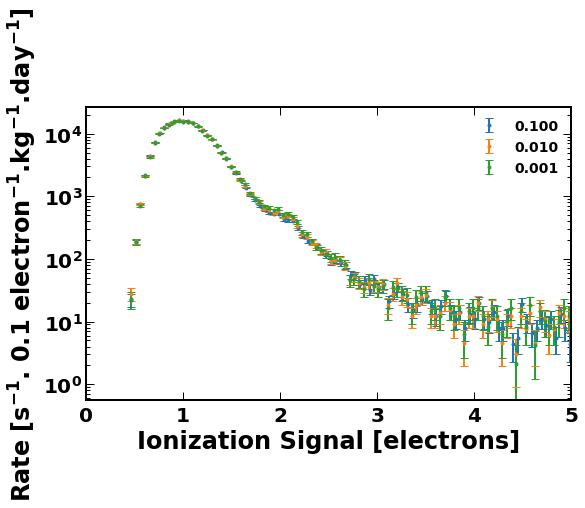

Krypton
 Time Cut: 40 ms, Live Time:  20.88 s, Exposure:  0.47 kg.day, Total Rate: 2273.73
 Time Cut: 40 ms, Live Time:  6.49 s, Exposure:  0.14 kg.day, Total Rate: 2239.58
 Time Cut: 40 ms, Live Time:  2.44 s, Exposure:  0.05 kg.day, Total Rate: 2170.17


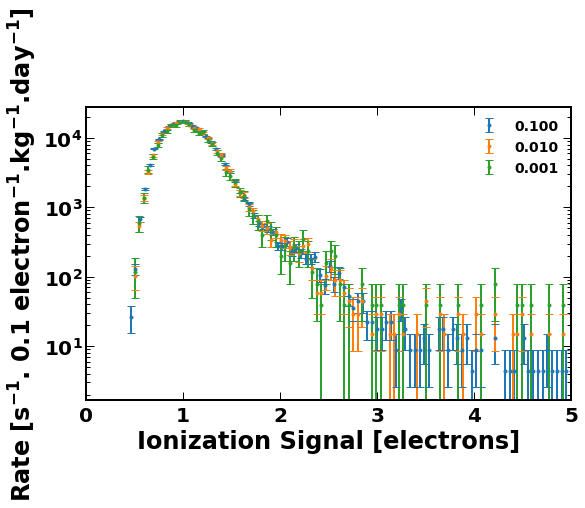

In [47]:
colours={'Radon': 'blue', 'Krypton': 'green', 'Background': 'red'}

electrons=[0.1, 0.01, 0.001]
for key, df in dict_sources_cuts.items():
    
    print(key)
    
    df_all = dict_source_sr1[key]
    df_all = df_all.drop_duplicates(subset=['run_number', 'event_number'])
    df_all = df_all.loc[(df_all['time_before_trigger']>1)]
    
    fig, ax = plt.subplots(figsize=(8.7, 5.4))
    for electron in electrons:
        #Apply Cut
        df_temp=df.loc[(tau*np.log(scaling_constant*tau*df['1_s2']/(electron)))<df['1_delay']/milliseconds]
        df_all_temp=df_all.loc[(tau*np.log(scaling_constant*tau*df_all['1_s2']/(electron)))<df_all['1_delay']/milliseconds]
        
        #Recalculate Livetime
        live_time = np.sum(df_all_temp['time_before_trigger']/10**9)
        exposure = fiducial_mass*live_time/seconds_per_day
        events = len(df_temp)
        print(" Time Cut: %i ms, Live Time:  %.2f s, Exposure:  %.2f kg.day, Total Rate: %.2f" %(cut, live_time, exposure, events/live_time))
        
        #Make Hist
        hist, binedges = np.histogram(df_temp['area']/pe_per_e, bins=_el_bins)    

        #Confidence Bands
        bin_width = binedges[1:]-binedges[:-1]  #in ms
        bin_centers = binedges[:-1]+(binedges[1:]-binedges[:-1])/2
        y1=hist-np.sqrt(hist)
        y2=hist+np.sqrt(hist)

        #Correct for Livetime and Binning
        hist=hist/live_time/bin_width/fiducial_mass*seconds_per_day/10
        y1 = y1/live_time/bin_width/fiducial_mass*seconds_per_day/10
        y2 = y2/live_time/bin_width/fiducial_mass*seconds_per_day/10
        #Dividng by 10 to get to 0.1 electrons

        ax.errorbar(x=bin_centers, 
                 y=hist,
                 yerr=[hist-y1, y2-hist],
                 label='%.3f electrons' %electron, fmt='.')


    plt.xlim([_el_min, _el_max])
    plt.legend(loc='best', fontsize=14)
    plt.yscale('log')
    plt.xlabel('Ionization Signal [electrons]')
    plt.ylabel('Rate [s$^{-1}$. 0.1 electron$^{-1}$.kg$^{-1}$.day$^{-1}$]')
    plt.show()



My rate is still  more than 3 orders of magnitude greater than Tianyu's. Check what applying absolute time cuts does.

Background
 Time Cut: 0 ms, Live Time:  327.93 s, Exposure:  7.30 kg.day, Total Rate: 3430.45
 Time Cut: 5 ms, Live Time:  283.12 s, Exposure:  6.31 kg.day, Total Rate: 2988.41
 Time Cut: 10 ms, Live Time:  236.59 s, Exposure:  5.27 kg.day, Total Rate: 2663.95
 Time Cut: 20 ms, Live Time:  176.98 s, Exposure:  3.94 kg.day, Total Rate: 2438.19
 Time Cut: 40 ms, Live Time:  110.76 s, Exposure:  2.47 kg.day, Total Rate: 2297.34


/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


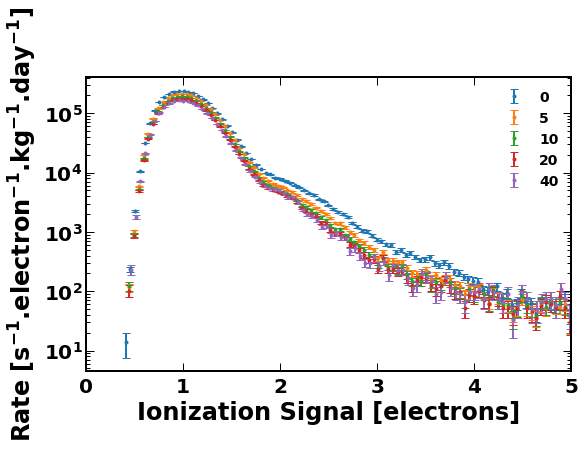

In [46]:
colours={'Radon': 'blue', 'Krypton': 'green', 'Background': 'red'}

time_cut=[0, 5, 10, 20, 40]
for key, df in dict_sources_cuts.items():
    if key!='Background':
        continue
    print(key)
    
    df_all = dict_source_sr1[key]
    df_all = df_all.drop_duplicates(subset=['run_number', 'event_number'])
    df_all = df_all.loc[(df_all['time_before_trigger']>1)]
    
    fig, ax = plt.subplots(figsize=(8.7, 5.4))
    for cut in time_cut:
        #Apply Cut
        df_temp=df.loc[df['1_delay']/milliseconds>cut]
        df_all_temp=df_all.loc[df_all['1_delay']/milliseconds>cut]
        
        #Re-Calculate Livetime
        live_time = np.sum(df_all_temp['time_before_trigger']/10**9)
        exposure = fiducial_mass*live_time/seconds_per_day
        events = len(df_temp)
        print(" Time Cut: %i ms, Live Time:  %.2f s, Exposure:  %.2f kg.day, Total Rate: %.2f" %(cut, live_time, exposure, events/live_time))
        
        #Make Hist
        hist, binedges = np.histogram(df_temp['area']/pe_per_e, bins=_el_bins)    

        #Confidence Bands
        bin_width = binedges[1:]-binedges[:-1]  #in ms
        bin_centers = binedges[:-1]+(binedges[1:]-binedges[:-1])/2
        y1=hist-np.sqrt(hist)
        y2=hist+np.sqrt(hist)

        #Correct for Livetime and Binning
        hist=hist/live_time/bin_width/fiducial_mass*seconds_per_day
        y1 = y1/live_time/bin_width/fiducial_mass*seconds_per_day
        y2 = y2/live_time/bin_width/fiducial_mass*seconds_per_day
        #Dividng by 10 to get to 0.1 electrons

        ax.errorbar(x=bin_centers, 
                 y=hist,
                 yerr=[hist-y1, y2-hist],
                 label='%i' %cut, fmt='.')


    plt.xlim([_el_min, _el_max])
    plt.legend(loc='best', fontsize=14)
    plt.yscale('log')
    plt.xlabel('Ionization Signal [electrons]')
    plt.ylabel('Rate [s$^{-1}$.electron$^{-1}$.kg$^{-1}$.day$^{-1}$]')
    plt.show()



Background
 Time Cut: 100 ms, Live Time:  39.16 s, Exposure:  0.87 kg.day, Total Rate: 2245.65
 Time Cut: 200 ms, Live Time:  11.15 s, Exposure:  0.25 kg.day, Total Rate: 2315.22
 Time Cut: 300 ms, Live Time:  4.00 s, Exposure:  0.09 kg.day, Total Rate: 2415.47
 Time Cut: 400 ms, Live Time:  1.63 s, Exposure:  0.04 kg.day, Total Rate: 2527.37


/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


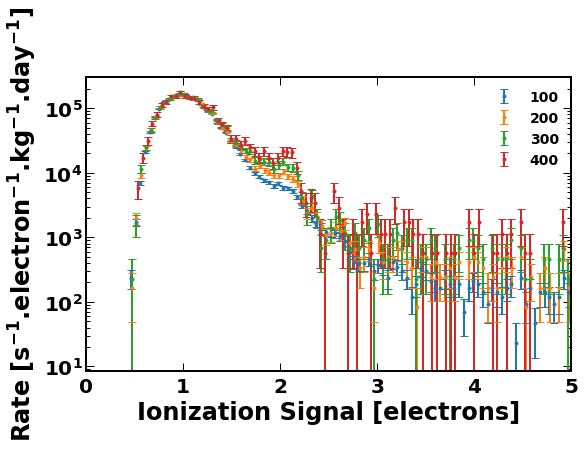

In [49]:
colours={'Radon': 'blue', 'Krypton': 'green', 'Background': 'red'}

time_cut=[100, 200, 300, 400]
for key, df in dict_sources_cuts.items():
    if key!='Background':
        continue
    print(key)
    
    df_all = dict_source_sr1[key]
    df_all = df_all.drop_duplicates(subset=['run_number', 'event_number'])
    df_all = df_all.loc[(df_all['time_before_trigger']>1)]
    
    fig, ax = plt.subplots(figsize=(8.7, 5.4))
    for cut in time_cut:
        #Apply Cut
        df_temp=df.loc[df['1_delay']/milliseconds>cut]
        df_all_temp=df_all.loc[df_all['1_delay']/milliseconds>cut]
        
        #Re-Calculate Livetime
        live_time = np.sum(df_all_temp['time_before_trigger']/10**9)
        exposure = fiducial_mass*live_time/seconds_per_day
        events = len(df_temp)
        print(" Time Cut: %i ms, Live Time:  %.2f s, Exposure:  %.2f kg.day, Total Rate: %.2f" %(cut, live_time, exposure, events/live_time))
        
        #Make Hist
        hist, binedges = np.histogram(df_temp['area']/pe_per_e, bins=_el_bins)    

        #Confidence Bands
        bin_width = binedges[1:]-binedges[:-1]  #in ms
        bin_centers = binedges[:-1]+(binedges[1:]-binedges[:-1])/2
        y1=hist-np.sqrt(hist)
        y2=hist+np.sqrt(hist)

        #Correct for Livetime and Binning
        hist=hist/live_time/bin_width/fiducial_mass*seconds_per_day
        y1 = y1/live_time/bin_width/fiducial_mass*seconds_per_day
        y2 = y2/live_time/bin_width/fiducial_mass*seconds_per_day
        #Dividng by 10 to get to 0.1 electrons

        ax.errorbar(x=bin_centers, 
                 y=hist,
                 yerr=[hist-y1, y2-hist],
                 label='%i' %cut, fmt='.')


    plt.xlim([_el_min, _el_max])
    plt.legend(loc='best', fontsize=14)
    plt.yscale('log')
    plt.xlabel('Ionization Signal [electrons]')
    plt.ylabel('Rate [s$^{-1}$.electron$^{-1}$.kg$^{-1}$.day$^{-1}$]')
    plt.show()



## TO DO

  * Change rate plots to weight peaks by number of eletrons
  
  * Notebook with position correlation studies
  
  * Is effect of spatial cut to produce flat SE rate in time?
  
  * After time cut is spatial correlation flat/consistent with background?

  * Investigate time diff between successive SE peaks





In [41]:
fiducial_mass*live_time/seconds_per_day

206.95488061891967